# Определение уязвимых групп населения

Задача:
* кластеризовать регионы России и определить, какие из них наиболее
остро нуждаются в помощи малообеспеченным/неблагополучным
слоям населения;
* описать группы населения, сталкивающиеся с бедностью;
* определить:
    * влияет ли число детей, пенсионеров и других социально уязвимых
групп на уровень бедности в регионе;
    * связаны ли уровень бедности/социального неблагополучия с
производством и потреблением в регионе;
    * какие ещё зависимости можно наблюдать относительно
социально незащищённых слоёв населения.


In [586]:
import pandas as pd
import numpy as np

## 1. Обработка данных

Регионы в полученных датасетах имеют разное написание, необходимо создать функцию, для приведения региона к одному виду.

In [587]:
# Создадим словарь названий для приведения к одному виду субъектов РФ

names = {'адыгея':'Республика Адыгея (Адыгея)','Республика Адыгея':'Республика Адыгея (Адыгея)','башкорт':'Республика Башкортостан',
'бурятия':'Республика Бурятия','дагестан':'Республика Дагестан','ингуш':'Республика Ингушетия',
'кабардино':'Кабардино-Балкарская Республика','кабардино-балкарская\nреспублика':'Кабардино-Балкарская Республика', 'карачаево':'Карачаево-Черкесская Республика', 'карачаево-черкесская\nреспублика':'Карачаево-Черкесская Республика',
'крым':'Республика Крым', 'республика саха':'Республика Саха (Якутия)', 'северная':'Республика Северная Осетия — Алания','республика северная\nосетия-алания':'Республика Северная Осетия — Алания',
'татарстан':'Республика Татарстан (Татарстан)','республика татарстан':'Республика Татарстан (Татарстан)', 'тыва':'Республика Тыва (Тува)','республика тыва':'Республика Тыва (Тува)',
'чечня':'Чеченская Республика', 'чеченская':'Чеченская Республика',
'чуваш':'Чувашская Республика — Чувашия','чувашская республика':'Чувашская Республика — Чувашия', 'кемеров':'Кемеровская область — Кузбасс','кемеровская область':'Кемеровская область — Кузбасс',
'владимир':'Владимирская область', 'bладимирская область':'Владимирская область', 'воронежская область':'Воронежская область','bоронежская область':'Воронежская область',
'волгоградская область':'Волгоградская область', 'bолгоградская область':'Волгоградская область', 'bологодская область':'Вологодская область',
'москва':'г. Москва', 'санкт':'г. Санкт-Петербург', 'севастополь':'г. Севастополь',
'еврейская':'Еврейская автономная область', 'ямало-ненецкий':'Ямало-Ненецкий автономный округ','ямало-ненецкий \nавтономный округ':'Ямало-Ненецкий автономный округ', 'ямало-ненецкий ао':'Ямало-Ненецкий автономный округ',
'ханты-мансийский':'Ханты-Мансийский автономный округ — Югра','ханты-мансийский \nавтономный округ - югра':'Ханты-Мансийский автономный округ — Югра',
'ненецкий автономный округ (архангельская область)':'Ненецкий автономный округ',
'ненецкий авт. округ':'Ненецкий автономный округ', 'архангельская':'Архангельская область', 'архангельская область':'Архангельская область', 'чукотский авт. округ':'Чукотский автономный округ',
'тюменская':'Тюменская область', '\nненецкий':'Ненецкий автономный округ', 'ханты-мансийский ао':'Ханты-Мансийский автономный округ — Югра',
'ямало-ненецкий ао':'Ямало-Ненецкий автономный округ', 'тюменская область без автономного округа':'Тюменская область','тюменская область без\nавтономных округов':'Тюменская область',
'ямало-ненецкий автономный округ':'Ямало-Ненецкий автономный округ', 'чукотский авт.округ':'Чукотский автономный округ'}

# Cоздадим функцию смены названия региона
def change_name(name):
    """Функция смены названия региона

    Args:
        name (str): название региона

    Returns:
        str: название региона унифицированное
    """
    for n in names:
        if n in name.lower():
            return names[n]
    return name


### 1.1 Доходы насселения

In [588]:
# Среднедушевые денежные доходы (в месяц), руб
cash_capita = pd.read_excel('data/cash_real_income_wages_2015_2020.xlsx')

# Исключим строки содержащие федеральный округ, федерация и район
district = cash_capita[cash_capita['region'].str.contains('федеральный округ|Федерация|район|числе')].index
cash_capita.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
cash_capita['region'] = cash_capita['region'].apply(change_name)

cash_capita.set_index('region', inplace=True)

print('Среднедушевые денежные доходы (в месяц), руб')
cash_capita.head()

Среднедушевые денежные доходы (в месяц), руб


,2015,2016,2017,2018,2019,2020
region,,,,,,
Белгородская область,28043,29799,30342,30778,32352,32841
Брянская область,23428,24006,25107,26585,28371,28596
Владимирская область,22712,22365,23554,23539,25358,25922
Воронежская область,29366,29284,29498,30289,32022,32078
Ивановская область,22297,23676,24860,24503,25794,26277


In [589]:
# Реальные денежные доходы, в процентах к предыдущему году
real_incomes = pd.read_excel('data/cash_real_income_wages_2015_2020.xlsx', 1)


# Исключим строки содержащие федеральный округ, федерация и район
district = real_incomes[real_incomes['region'].str.contains('федеральный округ|Федерация|район|числе')].index
real_incomes.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
real_incomes['region'] = real_incomes['region'].apply(change_name)

real_incomes.set_index('region', inplace=True)

print('Реальные денежные доходы, в процентах к предыдущему году')
real_incomes.head()

Реальные денежные доходы, в процентах к предыдущему году


,2015,2016,2017,2018,2019,2020
region,,,,,,
Белгородская область,99.3,100.8,99.1,98.7,100.6,98.1
Брянская область,97.0,95.0,99.4,102.1,100.5,96.3
Владимирская область,99.5,92.2,100.9,96.4,101.9,98.0
Воронежская область,101.1,93.6,97.4,100.0,101.1,95.4
Ивановская область,95.5,98.5,100.4,94.4,99.5,97.2


In [590]:
# Среднемесячная номинальная начисленная заработная плата, руб.
formal_wage_paid = pd.read_excel('data/cash_real_income_wages_2015_2020.xlsx', 2)

# Исключим строки содержащие федеральный округ, федерация и район
district = formal_wage_paid[formal_wage_paid['region'].str.contains('федеральный округ|Федерация|район|числе')].index
formal_wage_paid.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
formal_wage_paid['region'] = formal_wage_paid['region'].apply(change_name)

formal_wage_paid.set_index('region', inplace=True)

print('Среднемесячная номинальная начисленная заработная плата, руб.')
formal_wage_paid.head()

Среднемесячная номинальная начисленная заработная плата, руб.


,2015,2016,2017,2018,2019,2020
region,,,,,,
Белгородская область,25456,27091,29066,31852,34615,37442
Брянская область,21679,22923,24743,27251,29853,31946
Владимирская область,23877,25135,26975,30460,33076,35240
Воронежская область,24906,26335,28007,31207,33690,36317
Ивановская область,21161,22144,23470,25729,27553,29083


In [591]:
# Реальная начисленная заработная плата, в процентах к предыдущему году
real_pay = pd.read_excel('data/cash_real_income_wages_2015_2020.xlsx', 3)

# Исключим строки содержащие федеральный округ, федерация и район
district = real_pay[real_pay['region'].str.contains('федеральный округ|Федерация|район|числе')].index
real_pay.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
real_pay['region'] = real_pay['region'].apply(change_name)

real_pay.set_index('region', inplace=True)

print('Реальная начисленная заработная плата, в процентах к предыдущему году')
real_pay.head()

Реальная начисленная заработная плата, в процентах к предыдущему году


,2015,2016,2017,2018,2019,2020
region,,,,,,
Белгородская область,93.2,100.8,104.5,106.8,104.0,104.8
Брянская область,89,98.5,103.2,107.0,104.0,102.9
Владимирская область,91,99.2,103.6,109.9,103.5,103.0
Воронежская область,89.1,99.1,102.8,108.7,103.4,103.2
Ивановская область,87.9,97.6,102.1,106.0,102.1,101.6


### 1.2 Детская смертность

In [592]:

# Детская смертность в сельской местности

rural = pd.read_excel('data/child_mortality_rural_1990_2021.xls', skiprows=2)

# Удалим лишние столбцы
rural.drop(['Unnamed: 1', 'Unnamed: 2'], axis = 1, inplace=True)

# Исключим строки содержащие федеральный округ, федерация и район
district = rural[rural['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
rural['Unnamed: 0'] = rural['Unnamed: 0'].str.strip()
rural.drop(district, axis = 0, inplace=True)

rural.rename(columns={'Unnamed: 0':"region"}, inplace=True)

# Унифицируем названия регионов
rural['region'] = rural['region'].apply(change_name)

rural.set_index('region', inplace=True)

In [593]:

# Детская смертность в городской местности

urban = pd.read_excel('data/child_mortality_urban_1990_2021.xls', skiprows=2)

# Удалим лишние столбцы
urban.drop(['Unnamed: 1', 'Unnamed: 2'], axis = 1, inplace=True)

# Исключим строки содержащие федеральный округ, федерация и район
district = urban[urban['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
urban['Unnamed: 0'] = urban['Unnamed: 0'].str.strip()
urban.drop(district, axis = 0, inplace=True)

urban.rename(columns={'Unnamed: 0':"region"}, inplace=True)

# Унифицируем названия регионов
urban['region'] = urban['region'].apply(change_name)

urban.set_index('region', inplace=True)

# Объединяем детскую смертность с городов и регионов
child_mortality = rural.add(urban)
print('Количетсво умерших детей, чел.')
child_mortality.head()

Количетсво умерших детей, чел.


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,,,,,,,,,,,,,,
Белгородская область,312.0,290.0,240.0,244.0,233.0,203.0,174.0,167.0,160.0,161.0,...,127.0,116.0,103.0,110.0,108.0,77.0,73.0,39.0,47.0,54.0
Брянская область,322.0,304.0,283.0,297.0,256.0,229.0,212.0,202.0,182.0,184.0,...,127.0,124.0,126.0,111.0,103.0,96.0,45.0,37.0,41.0,27.0
Владимирская область,301.0,267.0,239.0,210.0,211.0,196.0,161.0,161.0,169.0,174.0,...,127.0,117.0,110.0,107.0,100.0,76.0,67.0,58.0,61.0,66.0
Воронежская область,399.0,441.0,418.0,362.0,348.0,321.0,273.0,275.0,302.0,280.0,...,166.0,186.0,145.0,126.0,120.0,108.0,99.0,81.0,70.0,83.0
Ивановская область,255.0,231.0,214.0,225.0,192.0,182.0,159.0,166.0,137.0,160.0,...,71.0,86.0,68.0,64.0,66.0,35.0,35.0,40.0,28.0,24.0


### 1.3 Количство инвалидов

In [594]:
disabled = pd.read_csv('data/disabled_total_by_age_2017_2022.csv')

# Исключаем строки содержащие федеральный округ, федерация и район
district = disabled[disabled['region'].str.contains('федеральный округ|Федерация|район|Байконур')].index
disabled.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
disabled['region'] = disabled['region'].apply(change_name)

disabled.set_index('region', inplace=True)

# Выполняем группировку по году
disabled['date'] = pd.to_datetime(disabled['date']).dt.year
disabled = disabled.groupby(['region','date'])['total'].sum().unstack()

print('Количество инвалидов, чел.')
disabled.head()

Количество инвалидов, чел.


date,2017,2018,2019,2020,2021,2022
region,,,,,,
Алтайский край,1987350.0,2120203.0,2100077.0,2060817.0,1986766.0,646296.0
Амурская область,816315.0,797050.0,785693.0,766768.0,733732.0,236444.0
Архангельская область,1056888.0,1038542.0,1031766.0,1016584.0,978993.0,316492.0
Астраханская область,533426.0,525601.0,523200.0,520687.0,511039.0,167664.0
Белгородская область,2625755.0,2522995.0,2446166.0,2359129.0,2252362.0,723760.0


### 1.4 Сведения о заболеваемости алкоголизмом и наркоманией

In [595]:
alco = pd.read_excel('data/drug_alco.xlsx', 0)
alco1718 = pd.read_excel('data/drug_alco.xlsx', 1)

# Исключаем строки содержащие федеральный округ, федерация и район
district = alco[alco['region'].str.contains('федеральный округ|Федерация|район|Байконур')].index
alco.drop(district, axis = 0, inplace=True)
district = alco1718[alco1718['region'].str.contains('федеральный округ|Федерация|район|Байконур')].index
alco1718.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
alco['region'] = alco['region'].apply(change_name)
alco1718['region'] = alco1718['region'].apply(change_name)

alco.set_index('region', inplace=True)
alco1718.set_index('region', inplace=True)

alco = pd.concat([alco, alco1718], axis=1).sort_index()

print('Количество человек с алкогольной зависимостью поставленных на учёт на 100 тысяч человек')
display(alco.head())

Количество человек с алкогольной зависимостью поставленных на учёт на 100 тысяч человек


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
region,,,,,,,,,,,,,,
Алтайский край,227.6,202.4,173.9,199.8,177.9,164.0,157.6,138.9,105.0,111.9,115.7,100.1,85.9,88.1
Амурская область,174.3,159.0,120.9,113.3,115.5,140.5,124.7,104.8,100.0,96.7,97.2,92.3,91.4,113.3
Архангельская область,120.1,115.2,102.5,89.8,96.5,99.5,84.4,73.2,77.6,NaN,NaN,NaN,55.3,64.7
Астраханская область,137.1,166.0,130.3,116.1,134.5,113.4,91.7,84.7,61.8,NaN,NaN,NaN,26.2,22.2
Белгородская область,99.6,93.2,84.0,92.3,94.3,86.4,72.6,74.8,66.9,56.8,50.7,46.1,45.2,41.3


In [596]:
drugs = pd.read_excel('data/drug_alco.xlsx', 2)
drugs1718 = pd.read_excel('data/drug_alco.xlsx', 3)

# Исключаем строки содержащие федеральный округ, федерация и район
district = drugs[drugs['region'].str.contains('федеральный округ|Федерация|район|Байконур')].index
drugs.drop(district, axis = 0, inplace=True)
district = drugs1718[drugs1718['region'].str.contains('федеральный округ|Федерация|район|Байконур')].index
drugs1718.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
drugs['region'] = drugs['region'].apply(change_name)
drugs1718['region'] = drugs1718['region'].apply(change_name)

drugs.set_index('region', inplace=True)
drugs1718.set_index('region', inplace=True)

drugs = pd.concat([drugs, drugs1718], axis=1).sort_index()

print('Количество человек с наркотической зависимостью поставленных на учёт на 100 тысяч человек')
drugs.head()

Количество человек с наркотической зависимостью поставленных на учёт на 100 тысяч человек


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
region,,,,,,,,,,,,,,
Алтайский край,29.8,35.2,35.2,37.7,27.3,24.5,26.4,33.4,22.9,21.6,20.7,17.4,17.4,17.4
Амурская область,21.3,27.2,27.2,28.4,26.2,37.1,33.9,24.2,22.5,22.2,19.1,18.9,18.7,24.4
Архангельская область,1.5,1.4,1.4,2.6,3.4,4.6,6.4,4.0,4.0,NaN,NaN,NaN,5.4,9.2
Астраханская область,10.7,12.9,12.9,6.8,8.1,9.8,7.5,5.1,2.3,NaN,NaN,NaN,0.7,0.2
Белгородская область,4.5,9.5,9.5,4.2,3.9,4.8,4.0,2.3,2.4,1.9,2.0,1.6,2.3,3.2


### 1.5 Валовой региональный продуктна душу населения, в рублях.

In [597]:

grass = pd.read_excel('data/gross_regional_product_1996_2020.xls', 
                      header=2)

# Исключим строки содержащие федеральный округ, федерация и район
district = grass[grass['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
grass['Unnamed: 0'] = grass['Unnamed: 0'].str.strip()
grass.drop(district, axis = 0, inplace=True)

grass.rename(columns={'Unnamed: 0':"region"}, inplace=True)

# Унифицируем названия регионов
grass['region'] = grass['region'].apply(change_name)

grass.set_index('region', inplace=True)

print('Валовой региональный продуктна душу населения, в рублях.')
grass.head()

Валовой региональный продуктна душу населения, в рублях.


,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,,,,,,,,,,,,
Белгородская область,9575.6,10792.2,12242.8,21398.0,27969.5,33126.7,41327.4,50271.4,75629.4,95911.2,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
Брянская область,7275.3,7175.7,7659.1,11752.4,17413.5,21511.9,27020.0,31953.4,37719.1,49923.4,...,137187.1,164726.6,175865.0,196096.7,221080.0,258752.7,280630.1,304547.1,332442.8,347204.5
Владимирская область,7620.7,8431.3,9350.2,15457.1,21073.3,27170.0,32923.6,40809.4,49353.4,58261.0,...,181842.6,200456.4,216320.8,232757.6,262945.5,309713.7,325043.1,349856.4,394560.3,410443.6
Воронежская область,7651.9,8686.6,9082.1,14808.3,20365.1,24905.4,34789.6,42237.5,49530.0,56534.5,...,203575.5,241947.4,262578.3,308004.7,345566.8,354657.9,374125.7,408140.7,431037.0,459629.5
Ивановская область,6725.4,6379.3,6804.5,9765.2,14240.0,18947.2,23396.9,29192.4,35732.7,40039.1,...,121945.5,129448.3,151263.6,146032.6,174687.5,200504.4,208522.0,230325.5,249591.6,273821.5


### 1.6 Оценка домохозяйствами состояния занимаемого ими жилого помещения

In [598]:
housing = pd.read_excel('data/housing_2020.xlsx')

housing.rename(columns={'Регион':"region"}, inplace=True)

# Исключим строки содержащие федеральный округ, федерация и район
district = housing[housing['region'].str.contains('федеральный округ|Федерация|район')].index
housing.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
housing['region'] = housing['region'].apply(change_name)

housing.set_index('region', inplace=True)

housing_conditions = pd.read_excel('data/housing_2020.xlsx', 1)
housing_conditions.rename(columns={'Регион':"region"}, inplace=True)

housing_conditions = housing_conditions.dropna(subset=['region'])

# Исключим строки содержащие федеральный округ, федерация и район
district = housing_conditions[housing_conditions['region'].str.contains('федеральный округ|Федерация|район')].index
housing_conditions.drop(district, axis = 0, inplace=True)


# Унифицируем названия регионов
housing_conditions['region'] = housing_conditions['region'].apply(change_name)

housing_conditions.set_index('region', inplace=True)

print('Средняя жилая площадь на человека, м^2')
living_area = housing[['Размер жилой площади в расчете на члена домохозяйства']]
display(living_area.head())

print('Плохие условия проживания')
# ВЫбираем столбец с плохими условиями
poor_living_conditions = housing_conditions[['из них указавшие: на плохое состояние или очень плохое состояние жилого помещения и на стесненность проживания']]
# Удалаям последнюю строку
poor_living_conditions = poor_living_conditions.drop(poor_living_conditions.index[-1])
poor_living_conditions.rename(columns={'из них указавшие: на плохое состояние или очень плохое состояние жилого помещения и на стесненность проживания':'poor_living'}, inplace=True)
display(poor_living_conditions.head())

Средняя жилая площадь на человека, м^2


,Размер жилой площади в расчете на члена домохозяйства
region,
Белгородская область,17.8
Брянская область,24.1
Владимирская область,16.1
Воронежская область,19.9
Ивановская область,18.1


Плохие условия проживания


,poor_living
region,
Белгородская область,0.4
Брянская область,0.0
Владимирская область,0.0
Воронежская область,0.1
Ивановская область,0.9


### 1.7 Заболеваемость

In [599]:
diseases = pd.read_excel('data/morbidity_2005_2020_age_disease.xls', skiprows=2)
diseases.rename(columns={'Unnamed: 0':"region",'Unnamed: 1':"Заболевания",'Unnamed: 2':"Группа"}, inplace=True)


# Исключим строки содержащие федеральный округ, федерация и район
district = diseases[diseases['region'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
diseases['region'] = diseases['region'].str.strip()
diseases.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
diseases['region'] = diseases['region'].apply(change_name)

# Назначим регион как индекс
diseases.set_index('region', inplace=True)
diseases = diseases[diseases['Группа'] == 'Всего']

# Выделим статистику по общем заболиваемости
general_morbidity = diseases[diseases['Заболевания'].isin(['Все заболевания'])].loc[:,['2015', '2016','Заболевания']]
general_morbidity = general_morbidity.dropna(axis=0)
general_morbidity = general_morbidity.groupby(['region','Заболевания'])['2015', '2016'].sum().unstack()
print('Статистика по общей заболиваемости')
general_morbidity.head()


Статистика по общей заболиваемости


C:\Users\qwaiv\AppData\Local\Temp\ipykernel_17184\3430533243.py:21: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,2015,2016
Заболевания,Все заболевания,Все заболевания
region,,
Алтайский край,109652.6,112764.7
Амурская область,83919.0,83412.0
Астраханская область,62055.8,64679.9
Белгородская область,70736.1,74637.4
Брянская область,78206.2,77439.0


### 1.8 Подростковая беременность

In [600]:
diseases = pd.read_excel('data/morbidity_2005_2020_age_disease.xls', skiprows=2)
diseases.rename(columns={'Unnamed: 0':"region",'Unnamed: 1':"Заболевания",'Unnamed: 2':"Группа"}, inplace=True)

# Исключим строки содержащие федеральный округ, федерация и район
district = diseases[diseases['region'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
diseases['region'] = diseases['region'].str.strip()
diseases.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
diseases['region'] = diseases['region'].apply(change_name)

# Назначим регион как индекс
diseases.set_index('region', inplace=True)
pregnancy = diseases[diseases['Заболевания'] == 'Беременность, роды и послеродовой период']

# Объеденим значения с таблиц по беременности детей до 14 и до 17 лет.
pregnancy_14 = pregnancy[pregnancy['Группа'] == '0-14 лет'].copy()
pregnancy_17 = pregnancy[pregnancy['Группа'] == '15-17 лет'].copy()

pregnancy_14.drop(['Группа', 'Заболевания'], axis = 1, inplace=True)
pregnancy_17.drop(['Группа', 'Заболевания'], axis = 1, inplace=True)
teen_pregnancy = pregnancy_14.add(pregnancy_17, fill_value=0)

# Удалим статистику до 2014 года, до 2014 года статистика велаась без автономных округов
teen_pregnancy.drop(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'], axis = 1, inplace=True)
print('Подростковая беременность, чел. на 100 тыс. человек')
display(teen_pregnancy.head())

Подростковая беременность, чел. на 100 тыс. человек


,2014,2015,2016
region,,,
Белгородская область,1264.7,1227.3,875.6
Брянская область,1076.7,862.7,705.5
Владимирская область,1771.9,1442.4,856.4
Воронежская область,553.1,369.8,272.0
Ивановская область,1023.5,542.5,491.3


### 1.9 Рождаемость

In [601]:
import regex as re

standard_names = names.copy()

newborn = pd.read_csv(
    'data/newborn_2006_2022_monthly.csv', sep=';', decimal=',')
newborn.rename({'Region': 'region'}, axis=1, inplace=True)
names_to_drop = [
    'Архангельская область (кроме Ненецкого автономного округа)',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
    'Московская обл. в старых границах',
    'Москва в старых границах'
]

# Исключим строки содержащие федеральный округ, федерация и район
district = newborn[newborn['region'].str.contains('федеральный округ|Федерация|район')].index
newborn.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
newborn['region'] = newborn['region'].apply(change_name)

# Назначим регион как индекс
newborn.set_index('region', inplace=True)
    
# Суммируем данные за год
for year in range(2006, 2023):
    cols = []
    for col in newborn.columns:
        if str(year) in str(col):
            cols.append(col)
    newborn[year] = newborn[cols].sum(axis=1)
    newborn.drop(columns=cols, inplace=True)
newborn.drop(columns=2022, inplace=True)  # Неполный год


newborn.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,,,,,,,,,
Белгородская область,14269.0,15666.00,16810.00,16911.00,16669.00,16894.00,17913.00,17883.00,17822.00,17864.00,17261.0,15113.00,14318.00,13197.99,12351.99,12223.0
Брянская область,12042.0,13282.99,14319.00,14406.00,13773.00,13806.00,14376.00,13855.00,13657.99,14067.00,13379.0,11552.99,11124.00,10028.00,9480.00,9047.0
Владимирская область,13915.0,14679.00,15699.00,15520.00,15540.00,15644.00,16445.00,15777.00,15817.00,16284.00,15662.0,13395.00,12658.00,11158.00,10120.00,9780.0
Воронежская область,19208.0,20568.99,22421.99,23560.99,23819.99,23826.97,25373.99,24980.97,25331.99,25923.98,24938.0,22423.00,21381.99,19643.00,19161.00,18593.0
Ивановская область,9818.0,10617.00,11138.00,11329.98,11131.00,11035.00,11581.00,11769.00,11694.97,11761.00,11184.0,9877.00,9134.00,7951.00,7563.00,7327.0


### 1.10 процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума), оценка за год по регионам

In [602]:
poverty_percent = pd.read_csv('data/poverty_percent_by_regions_1992_2020.csv')
poverty_percent = pd.pivot_table(data=poverty_percent, 
        values='poverty_percent', columns='year', index='region').reset_index()

# Исключим строки содержащие федеральный округ, федерация и район
district = poverty_percent[poverty_percent['region'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
poverty_percent['region'] = poverty_percent['region'].str.strip()
poverty_percent.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
poverty_percent['region'] = poverty_percent['region'].apply(change_name)

# Назначим регион как индекс
poverty_percent.set_index('region', inplace=True)

poverty_percent.head(3)

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,,,,,,,,,,,,
Архангельская область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.0,14.5,14.5,16.2,14.9,13.9,12.5,12.7,12.3
Ненецкий автономный округ,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,37.9,26.9,...,7.7,6.5,7.8,8.9,9.4,10.1,10.6,9.7,9.4,9.4
Тюменская область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.4,11.8,12.0,14.7,15.5,15.4,14.3,14.4,13.6


### 1.11 Распределение малоимущего населения по социально-демографическим группам

In [603]:
def socdem(x):
    """Изменяем название столбца с регионами, приводим название регионов
    к общему виду.

    Args:
        x (xls): таблица с данными
    Returns:
        DataFrame: изменнённый датафрейм
    """
    df = pd.read_excel(x, header=2)
    df.rename({'Unnamed: 0': 'region'}, axis=1, inplace=True)
    district = df[df['region'].str.contains('федеральный округ|Федерация|район')].index
    # Удаляем пробелы перед названием регионов
    df['region'] = df['region'].str.strip()
    df.drop(district, axis = 0, inplace=True)
    df['region'] = df['region'].apply(change_name)
    df.set_index('region', inplace=True)
    return df

poverty_socdem_2017 = socdem(
    'data/poverty_socdem_2017.xls')
poverty_socdem_2018 = socdem(
    'data/poverty_socdem_2018.xls')
poverty_socdem_2019 = socdem(
    'data/poverty_socdem_2019.xls')
poverty_socdem_2020 = socdem(
    'data/poverty_socdem_2020.xls')

# Приведём всё к одному датафрейму, 
#заменим пропуски и нули значениями из прошлый таблиц
proverty_socdem = poverty_socdem_2020.replace({0: np.nan}).combine_first(poverty_socdem_2019)
proverty_socdem = proverty_socdem.replace({0:np.nan}).combine_first(poverty_socdem_2018)
proverty_socdem = proverty_socdem.replace({0:np.nan}).combine_first(poverty_socdem_2017)

print('Процентное соотношение малоимущего населения по группам')
proverty_socdem.head()

Процентное соотношение малоимущего населения по группам


,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
region,,,,
Белгородская область,100,44.8,12.9,42.3
Брянская область,100,44.8,3.7,51.6
Владимирская область,100,34.8,4.8,60.4
Воронежская область,100,28.5,2.3,69.2
Ивановская область,100,47.5,5.0,47.5


В данных наблюдалось большое количество нулей и пропусков, объединили данные с последнего года с данными прошлых лет.

### 1.12 Объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами.

In [604]:
reg_prod = pd.read_csv('data/regional_production_2017_2020.csv')

# Исключим строки содержащие федеральный округ, федерация и район
district = reg_prod[reg_prod['region'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
reg_prod['region'] = reg_prod['region'].str.strip()
reg_prod.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
reg_prod['region'] = reg_prod['region'].apply(change_name)

# Назначим регион как индекс
reg_prod.set_index('region', inplace=True)

# Выделим датафрейм с показателем по добыче полезных ископаемых
reg_mining = reg_prod[reg_prod['production_field'] == 'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ'].loc[:,'2017':'2020']
# Выделим датафрейм с показателем по обеспечения электроэнергией
reg_electric = reg_prod[reg_prod['production_field'] == 'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА'].loc[:,'2017':'2020']
# Выделим показатель водоснабжения, утилизации отходов и ликвидации загрязнений
reg_water = reg_prod[reg_prod['production_field'] == 'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ'].loc[:,'2017':'2020']
# Выделим датафрейм с показателем по обрабатывающим производствам
reg_manuf = reg_prod[reg_prod['production_field'] == 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА'].loc[:,'2017':'2020']
# Выделим датафрейм с показателем по промышленности
reg_indust = reg_prod[reg_prod['production_field'] == 'Промышленное производство (промышленность)'].loc[:,'2017':'2020']

print('Добыча полезных ископаемых, в тысячах рублей: ')
display(reg_mining.head(2))
print('ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА, в тысячах рублей:')
display(reg_electric.head(2))
print('ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ, в тысячах рублей:')
display(reg_water.head(2))
print('ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА, в тысячах рублей:')
display(reg_manuf.head(2))
print('Промышленное производство (промышленность), в тысячах рублей:')
display(reg_indust.head(2))

Добыча полезных ископаемых, в тысячах рублей: 


,2017,2018,2019,2020
region,,,,
Белгородская область,116588313.5,148863422.7,178389894.9,189803813.7
Брянская область,277427.7,261549.5,338027.3,310665.9


ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА, в тысячах рублей:


,2017,2018,2019,2020
region,,,,
Белгородская область,27030715.9,26805485.3,26542583.5,26787381.9
Брянская область,16064108.9,17730258.7,17708749.5,17876399.5


ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ, в тысячах рублей:


,2017,2018,2019,2020
region,,,,
Белгородская область,10614103.8,8936415.0,11404169.8,11175025.3
Брянская область,7347143.3,8901072.7,9258735.3,9588966.4


ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА, в тысячах рублей:


,2017,2018,2019,2020
region,,,,
Белгородская область,629092604.8,7.108288e+08,7.226997e+08,7.463807e+08
Брянская область,191018941.6,2.185441e+08,2.536616e+08,2.556862e+08


Промышленное производство (промышленность), в тысячах рублей:


,2017,2018,2019,2020
region,,,,
Белгородская область,783325738.0,8.954341e+08,9.390364e+08,9.741469e+08
Брянская область,214707621.5,2.454370e+08,2.809671e+08,2.834622e+08


### 1.13 Оборот розничной торговли на душу населения, в рублях.


In [605]:
retail = pd.read_excel('data/retail_turnover_per_capita_2000_2021.xls', 
                        header=2, usecols='A, P:X')
retail.rename({'Unnamed: 0': 'region'}, axis=1, inplace=True)
retail.drop(0, inplace=True)

# Исключим строки содержащие федеральный округ, федерация и район
district = retail[retail['region'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
retail['region'] = retail['region'].str.strip()
retail.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
retail['region'] = retail['region'].apply(change_name)

# Назначим регион как индекс
retail.set_index('region', inplace=True)

retail.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,,
Белгородская область,144992,164079,178097,192504,203298,217059,230704,237076,259151
Брянская область,138669,158501,177048,179767,192775,209987,225818,225643,257679
Владимирская область,116202,129564,139408,143643,153088,164519,175251,177680,207670
Воронежская область,158218,181499,198814,208638,221302,236953,251882,252416,296665
Ивановская область,121813,138185,143349,143568,153993,163290,178517,180314,211546


### 1.14 Дети-сироты

Возмём данные о сиротах с портата [tochno.st](https://tochno.st/problems/orphanhood)

In [606]:
# Дети нуждающиеся в устройстве в семьи

orphans = pd.read_excel(
    'data/problem_orphanhood_all.xls', 1)
orphans.rename({'Название региона':'region'}, axis=1, inplace=True)

# Исключим строки содержащие федеральный округ, федерация и район
district = orphans[orphans['region'].str.contains('федеральный округ|Федерация|район')].index
# Удаляем пробелы перед названием регионов
orphans['region'] = orphans['region'].str.strip()
orphans.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
orphans['region'] = orphans['region'].apply(change_name)

# Назначим регион как индекс
orphans.set_index('region', inplace=True)

print('Дети нуждающиеся в устройтсве в семьи, чел')
orphans

Дети нуждающиеся в устройтсве в семьи, чел


,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,
Алтайский край,1476,1337,1071,916,889,857,886,860
Амурская область,1618,881,689,610,621,513,510,514
Архангельская область,1263,1197,1033,990,976,839,812,796
Астраханская область,694,513,542,324,300,279,281,336
Белгородская область,310,267,198,189,166,233,191,168
...,...,...,...,...,...,...,...,...
Чеченская Республика,0,0,0,0,0,0,0,0
Чувашская Республика — Чувашия,153,130,111,106,120,123,124,129
Чукотский автономный округ,61,75,65,33,41,50,53,54


In [607]:
# Дети устроенные в семьи

adopted = pd.read_excel(
    'data/problem_orphanhood_all.xls', 2)
adopted.rename({'Название региона':'region'}, axis=1, inplace=True)

# Исключим строки содержащие федеральный округ, федерация и район
district = adopted[adopted['region'].str.contains('федеральный округ|Федерация|район')].index
adopted.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
adopted['region'] = adopted['region'].apply(change_name)

# Назначим регион как индекс
adopted.set_index('region', inplace=True)

print('Дети устроенные в семьи, чел.')
adopted

Дети устроенные в семьи, чел.


,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,
Алтайский край,975,1163,1062,906,867,894,842,785
Амурская область,882,752,663,515,551,478,441,377
Архангельская область,583,585,542,464,409,386,345,416
Астраханская область,633,635,586,409,367,290,238,261
Белгородская область,288,289,250,226,248,235,259,200
...,...,...,...,...,...,...,...,...
Чеченская Республика,270,413,445,407,269,317,320,248
Чувашская Республика — Чувашия,399,361,279,186,209,230,179,198
Чукотский автономный округ,90,45,36,26,17,40,26,49


In [608]:
# Дети устроенные в семьи

children = pd.read_excel(
    'data/problem_orphanhood_all.xls', 3)
children.rename({'Название региона':'region'}, axis=1, inplace=True)

# Исключим строки содержащие федеральный округ, федерация и район
district = children[children['region'].str.contains('федеральный округ|Федерация|район')].index
children.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
children['region'] = children['region'].apply(change_name)

# Назначим регион как индекс
children.set_index('region', inplace=True)

print('Общее число детей, %')
children=children.replace(',', '.', regex=True)
children=children.apply(pd.to_numeric)
children

Общее число детей, %


,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,
Алтайский край,19.646345,20.059191,20.456173,20.781932,21.0,21.12608,21.15307,21.12066
Амурская область,21.364668,21.618204,21.994219,22.275716,22.5,22.66709,22.61925,22.65216
Архангельская область,19.484662,19.822887,20.165894,20.423547,20.7,20.75716,20.70881,20.57189
Астраханская область,20.616596,21.073704,21.622460,22.026743,22.3,22.45260,22.62031,22.75667
Белгородская область,17.518399,17.733033,18.047179,18.334884,18.6,18.69133,18.76473,18.79353
...,...,...,...,...,...,...,...,...
Чеченская Республика,38.082036,38.133270,38.045377,37.755475,37.5,37.23866,37.08949,36.78251
Чувашская Республика — Чувашия,19.848885,20.167260,20.539160,20.827389,21.1,21.20484,21.25966,21.32721
Чукотский автономный округ,24.810602,25.083102,25.208844,25.432540,25.6,25.66297,25.09943,25.08127


### 1.15 Пенсионеры

Возмём данные о пенсионерах с портата [tochno.st](https://tochno.st/problems/ageing)

In [609]:
retiree = pd.read_excel(
    'data/problem_ageing_all.xls', 1)
retiree.rename({'Название региона':'region'}, axis=1, inplace=True)

retiree = retiree.replace({'н/д':np.nan})
retiree = retiree.replace({'#Н/Д':np.nan})

# Исключим строки содержащие федеральный округ, федерация и район
district = retiree[retiree['region'].str.contains('федеральный округ|Федерация|район')].index
retiree.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
retiree['region'] = retiree['region'].apply(change_name)

# Назначим регион как индекс
retiree.set_index('region', inplace=True)

print('Число пенсионеров по старости, чел.')
retiree

Число пенсионеров по старости, чел.


,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,
Алтайский край,NaN,611277.0,623875,633889,639156,644202,635837,621903
Амурская область,NaN,185662.0,187677,189435,189829,190409,187013,182114
Архангельская область,NaN,370596.0,371102,371676,369889,368549,364257,358368
Астраханская область,NaN,208433.0,212669,216482,219159,222267,220155,216094
Белгородская область,NaN,402865.0,408702,415369,418947,423757,419229,413269
...,...,...,...,...,...,...,...,...
Чеченская Республика,NaN,183107.0,192284,197902,199414,200068,196700,193650
Чувашская Республика — Чувашия,NaN,300256.0,306823,310971,315924,320616,318546,313258
Чукотский автономный округ,NaN,12200.0,12403,12381,12372,12468,12391,12147


In [610]:
# средний размер пенсии

pension = pd.read_excel(
    'data/problem_ageing_all.xls', 2)
pension.rename({'Название региона':'region'}, axis=1, inplace=True)

pension = pension.replace({'н/д':np.nan})
pension = pension.replace({'#Н/Д':np.nan})

# Исключим строки содержащие федеральный округ, федерация и район
district = pension[pension['region'].str.contains('федеральный округ|Федерация|район')].index
pension.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
pension['region'] = pension['region'].apply(change_name)

# Назначим регион как индекс
pension.set_index('region', inplace=True)


print('Средний размер пенсии, руб.')
pension.head()

Средний размер пенсии, руб.


,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,
Алтайский край,10527.87,11584.09,11876.7,12452.76,13631.35,14469.62,15291.93,NaN
Амурская область,11712.63,13024.49,13379.94,14007.13,15244.6,16165.69,17101.09,NaN
Архангельская область,NaN,NaN,NaN,NaN,NaN,NaN,20534.57,NaN
Астраханская область,10183.38,11279.59,11545.97,12110.49,13191.25,13991.39,14775.47,NaN
Белгородская область,11146.03,12401.37,12783.39,13420.88,14732.62,15682.42,16606.24,NaN


In [611]:
retired_percent = pd.read_excel('data/problem_ageing_all.xls', 3)
retired_percent.rename({'Название региона':'region'}, axis=1, inplace=True)

retired_percent = retired_percent.replace({'н/д':np.nan})
retired_percent = retired_percent.replace({'#Н/Д':np.nan})

# Исключим строки содержащие федеральный округ, федерация и район
district = retired_percent[retired_percent['region'].str.contains('федеральный округ|Федерация|район')].index
retired_percent.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
retired_percent['region'] = retired_percent['region'].apply(change_name)

# Назначим регион как индекс
retired_percent.set_index('region', inplace=True)

# Заменяем запятые в значенияз ячеек
retired_percent = retired_percent.replace(',', '.', regex=True)
retired_percent = retired_percent.apply(pd.to_numeric)

retired_percent

,2017,2014,2015,2016,2018,2019,2020,2021
region,,,,,,,,
Алтайский край,26.6,NaN,25.3,26.0,27.2,27.8,26.8,27.1
Амурская область,22.6,NaN,21.7,22.2,22.9,23.3,22.4,22.5
Архангельская область,26.2,NaN,33.0,25.6,26.8,27.3,26.4,26.8
Астраханская область,23.7,NaN,22.7,23.2,24.2,24.6,23.9,24.3
Белгородская область,27.2,NaN,26.1,26.6,27.7,28.2,27.2,27.5
...,...,...,...,...,...,...,...,...
Чеченская Республика,10.0,NaN,9.2,9.6,10.4,10.8,10.3,10.5
Чувашская Республика — Чувашия,24.4,NaN,23.3,23.9,25.0,25.7,24.9,25.3
Чукотский автономный округ,13.9,NaN,12.5,13.2,14.7,15.2,14.5,15.2


### 1.16 Прожиточный минимум

Возмём данные с сайта [rosstat.gov.ru](https://rosstat.gov.ru/vpm). На сайте росстата сведения о прожиточным минимуме по регионам есть только за 4 квартал 2020г.

In [612]:
living_wage = pd.read_excel('data/vpm_4_2020.xlsx')

# Исключим строки содержащие федеральный округ, федерация и район
district = living_wage[living_wage['region'].str.contains('федеральный округ|Федерация|район')].index
living_wage.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
living_wage['region'] = living_wage['region'].apply(change_name)

# Назначим регион как индекс
living_wage.set_index('region', inplace=True)

living_wage.head()

,Прожиточный минимум
region,
Белгородская область,9593.0
Брянская область,10950.0
Владимирская область,10808.0
Воронежская область,9053.0
Ивановская область,10581.0


### 1.17 Население

In [613]:
population = pd.read_excel('data/population.xlsx')

# Исключим строки содержащие федеральный округ, федерация и район
district = population[population['region'].str.contains('федеральный округ|Федерация|район')].index
population.drop(district, axis = 0, inplace=True)

# Унифицируем названия регионов
population['region'] = population['region'].apply(change_name)

# Назначим регион как индекс
population.set_index('region', inplace=True)

population


,Unnamed: 1
region,
Белгородская область,1541259
Брянская область,1182682
Владимирская область,1342099
Воронежская область,2305608
Ивановская область,987032
...,...
Амурская область,781846
Магаданская область,139034
Сахалинская область,485621


### 1.18 Преобразуем показатели и объединимв один датафрейм

In [614]:
# Доходы населения, руб
cash_capita_m = cash_capita.mean(axis=1)
# Среднемесячная номинальная начисленная заработная плата, руб.
formal_wage_paid_m = formal_wage_paid.mean(axis=1)
# Детская смертность, чел.
child_mortality_m = child_mortality.mean(axis=1).copy()
# Количество инвалидов, чел.
disabled_m = disabled.mean(axis=1)
# Сведенья о заболиваемости алкоголизмом, чел на 100 тысяч человек
alco_m = alco.mean(axis=1)
# Сведенья о нарко зависимых, чел на 100 тысяч человек
drugs_m = drugs.mean(axis=1)
# Валовой региональный продуктна душу населения, в рублях.
grass_m = grass.mean(axis=1)
# Средняя жилая площадь на человека, м^2
living_area
# Плохие условия проживания среди малоимущего населения, %
poor_living_conditions
# Статистика по общей заболиваемости, чел на 100 тысяч человек
general_morbidity_m = general_morbidity.mean(axis=1)
# Подростковая беременность, чел. на 100 тыс. человек
teen_pregnancy_m = teen_pregnancy.mean(axis=1)
# Рождаемость, чел.
newborn_m = newborn.mean(axis=1)
# Процент населения за чертой бедности
poverty_percent_m = poverty_percent.mean(axis=1)
# Распределение малоимущего населения по социально-демографическим группам,
#процент
children_per = proverty_socdem['Дети в возрасте до 16 лет']
pensioners_per = proverty_socdem['Население старше трудоспособного возраста']
working_age_per = proverty_socdem['Население трудоспособного возраста']
# Добыча полезных ископаемых, в тысячах рублей
reg_mining_m = reg_mining.mean(axis=1)
# ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; 
#КОНДИЦИОНИРОВАНИЕ ВОЗДУХА, в тысячах рублей
reg_electric_m = reg_electric.mean(axis=1)
# ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, 
#ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ, в тысячах рублей
reg_water_m = reg_water.mean(axis=1)
# ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА, в тысячах рублей
reg_manuf_m = reg_manuf.mean(axis=1)
# Промышленное производство (промышленность), в тысячах рублей:
reg_indust_m = reg_indust.mean(axis=1)
# Оборот розничной торговли на душу населения, в рублях.
retail_m = retail.mean(axis=1)
# Дети нуждающиеся в устройтсве в семьи, чел
orphans_m = orphans.mean(axis=1)
# Дети устроенные в семьи, чел.
adopted_m = adopted.mean(axis=1)
# Число пенсионеров по старости, чел.
retiree_m = retiree.mean(axis=1)
# Средний размер пенсии, руб
pension_m = pension.mean(axis=1)
# Прожиточный минимум за 4 квартал 2020г., руб.
living_wage
# Общее число детей, %
children_m = children.mean(axis=1)
# Население по регионам, чел
population
# Процент пенсионеров среди всего населения 
retired_percent_m = retired_percent.mean(axis=1)

C:\Users\qwaiv\AppData\Local\Temp\ipykernel_17184\1729864895.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\qwaiv\AppData\Local\Temp\ipykernel_17184\1729864895.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\qwaiv\AppData\Local\Temp\ipykernel_17184\1729864895.py:53: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [616]:
result = pd.concat([cash_capita_m, formal_wage_paid_m, child_mortality_m, disabled_m, alco_m,
                    drugs_m, grass_m, living_area, poor_living_conditions,
                    general_morbidity_m, teen_pregnancy_m, newborn_m,
                    poverty_percent_m, children_per, pensioners_per, 
                    working_age_per, reg_mining_m, reg_electric_m, reg_water_m,
                    reg_manuf_m, reg_indust_m, retail_m, orphans_m, adopted_m,
                    retiree_m, pension_m, living_wage, children_m, population, retired_percent_m], axis=1).fillna(0)

result.columns=['cash capita','formal wage','child mortality','disabled','alcoholism','narcotism','gross product','living area','poor living conditions','general morbidity',
'teen pregnancy','brith','proverty percent','poverty children','poverty pensioner','poverty man','minerals mining','electricity and gas','water and garbage collection',
'manufacturing industries','industrial production','retail per capita','orhans','adopted children','number of pensioners','pension','living_wage','children %','population',
'retired %']


result = result.replace({0:np.nan}).copy()
region_isna = result.isna().sum(axis=1).sort_values(ascending=False).head(18)
display(region_isna)

region
Ямало-Hенецкий АО                                                                   30
Главное медицинское управление Управления делами Президента Российской Федерации    30
Московская обл. в старых границах                                                   29
Агинский Бурятский округ (Забайкальский край)                                       28
Коми-Пермяцкий округ, входящий в состав Пермского края                              28
Таймырский (Долгано-Ненецкий) автономный округ (Красноярский край)                  28
Эвенкийский автономный округ (Красноярский край)                                    28
Усть-Ордынский Бурятский округ                                                      28
Корякский округ, входящий в состав Камчатского края                                 28
г. Севастополь                                                                       4
Республика Калмыкия                                                                  3
Архангельская область               

Видим, что есть пустые регионы и регионы с одним значением, которые не обработались через унификацию, такие строки будем удалять.

In [617]:
delete = ['Ямало-Hенецкий АО', 'Главное медицинское управление Управления делами Президента Российской Федерации'
          ,'Усть-Ордынский Бурятский округ', 'Таймырский (Долгано-Ненецкий) автономный округ (Красноярский край)',
          'Эвенкийский автономный округ (Красноярский край)', 'Коми-Пермяцкий округ, входящий в состав Пермского края',
          'Агинский Бурятский округ (Забайкальский край)', 'Корякский округ, входящий в состав Камчатского края',
          'Московская обл. в старых границах']
result=result.drop(delete)

In [618]:
# В столбцу poor living conditions заменим значения NaN нулями, т.к. это
#значение отражает долю плохого условия проижвания среди малоимущего населения
result['poor living conditions'].fillna(0, inplace=True)
result

,cash capita,formal wage,child mortality,disabled,alcoholism,narcotism,gross product,living area,poor living conditions,general morbidity,...,industrial production,retail per capita,orhans,adopted children,number of pensioners,pension,living_wage,children %,population,retired %
region,,,,,,,,,,,,,,,,,,,,,
Белгородская область,30692.500000,30920.333333,139.21875,2.155028e+06,76.475000,4.216667,244680.468,17.8,0.4,72686.75,...,8.979858e+08,202995.555556,215.250,249.375,414591.142857,16606.24,9593.0,18.310386,1541259.0,27.214286
Брянская область,26015.500000,26399.166667,154.40625,1.131007e+06,169.416667,14.050000,123532.820,24.1,0.0,77822.60,...,2.561435e+08,196209.666667,350.500,322.000,291857.571429,16274.25,10950.0,18.620793,1182682.0,27.428571
Владимирская область,23908.333333,29127.166667,142.78125,1.318312e+06,121.350000,9.741667,149340.336,16.1,0.0,93964.65,...,5.206868e+08,156336.111111,408.500,485.625,396645.142857,16415.19,10808.0,17.989794,1342099.0,28.914286
Воронежская область,30422.833333,30077.000000,216.31250,2.291732e+06,129.575000,16.508333,168933.316,19.9,0.1,54782.65,...,6.144695e+08,222931.888889,207.375,644.500,627980.714286,15589.71,9053.0,17.079093,2305608.0,28.485714
Ивановская область,24567.833333,24856.666667,116.25000,8.287487e+05,154.691667,10.558333,98471.104,18.1,0.9,88113.70,...,1.935562e+08,159397.222222,402.625,282.500,281335.000000,15864.25,10581.0,17.835351,987032.0,28.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,30861.500000,41014.333333,174.84375,6.893337e+05,119.933333,25.683333,196049.812,17.3,0.3,83665.50,...,1.602760e+08,205867.000000,744.500,582.375,187448.428571,17101.09,13530.0,22.211413,781846.0,22.514286
Магаданская область,58826.833333,82467.500000,26.43750,5.328867e+04,346.141667,20.566667,488520.872,13.8,0.0,68714.80,...,1.856124e+08,214824.222222,230.250,59.125,40223.000000,24535.98,20830.0,20.632775,139034.0,21.014286
Сахалинская область,53568.333333,75366.833333,68.25000,2.282195e+05,315.025000,29.800000,860733.340,17.2,0.0,82027.20,...,9.295749e+08,294622.777778,299.000,263.625,145305.571429,21655.01,16130.0,21.016274,485621.0,22.971429


In [619]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Белгородская область to Чукотский автономный округ
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cash capita                   85 non-null     float64
 1   formal wage                   85 non-null     float64
 2   child mortality               85 non-null     float64
 3   disabled                      85 non-null     float64
 4   alcoholism                    83 non-null     float64
 5   narcotism                     83 non-null     float64
 6   gross product                 85 non-null     float64
 7   living area                   85 non-null     float64
 8   poor living conditions        85 non-null     float64
 9   general morbidity             84 non-null     float64
 10  teen pregnancy                84 non-null     float64
 11  brith                         85 non-null     float64
 12  proverty percent            

In [620]:
result['general morbidity']['Архангельская область'] = (101587.4+99842.1)/2
result['teen pregnancy']['Архангельская область'] = (10.5+2445.9+6.9+1675.6+13.8+1063.1)/3

# По предоставленной статистике детей сирот нет в Чеченской Республике
#и в Республике Ингушетия, заменим NaN на 0
result['orhans']['Чеченская Республика'] = 0
result['orhans']['Республика Ингушетия'] = 0

result['population']['Республика Марий Эл'] = 675332  
result['population']['Красноярский край'] = 2855899  

# Заменим пропущенные данные нулями
result.fillna(0, inplace=True)

Недостающие значения были прописаны в ручную, по остальным пропускам в предоставленных таблицах данных нет. Работа поджимает, поэтому не стал разбираться в неправильном считывании данных.

In [621]:
result.to_csv('data/regions.csv')
result

,cash capita,formal wage,child mortality,disabled,alcoholism,narcotism,gross product,living area,poor living conditions,general morbidity,...,industrial production,retail per capita,orhans,adopted children,number of pensioners,pension,living_wage,children %,population,retired %
region,,,,,,,,,,,,,,,,,,,,,
Белгородская область,30692.500000,30920.333333,139.21875,2.155028e+06,76.475000,4.216667,244680.468,17.8,0.4,72686.75,...,8.979858e+08,202995.555556,215.250,249.375,414591.142857,16606.24,9593.0,18.310386,1541259.0,27.214286
Брянская область,26015.500000,26399.166667,154.40625,1.131007e+06,169.416667,14.050000,123532.820,24.1,0.0,77822.60,...,2.561435e+08,196209.666667,350.500,322.000,291857.571429,16274.25,10950.0,18.620793,1182682.0,27.428571
Владимирская область,23908.333333,29127.166667,142.78125,1.318312e+06,121.350000,9.741667,149340.336,16.1,0.0,93964.65,...,5.206868e+08,156336.111111,408.500,485.625,396645.142857,16415.19,10808.0,17.989794,1342099.0,28.914286
Воронежская область,30422.833333,30077.000000,216.31250,2.291732e+06,129.575000,16.508333,168933.316,19.9,0.1,54782.65,...,6.144695e+08,222931.888889,207.375,644.500,627980.714286,15589.71,9053.0,17.079093,2305608.0,28.485714
Ивановская область,24567.833333,24856.666667,116.25000,8.287487e+05,154.691667,10.558333,98471.104,18.1,0.9,88113.70,...,1.935562e+08,159397.222222,402.625,282.500,281335.000000,15864.25,10581.0,17.835351,987032.0,28.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,30861.500000,41014.333333,174.84375,6.893337e+05,119.933333,25.683333,196049.812,17.3,0.3,83665.50,...,1.602760e+08,205867.000000,744.500,582.375,187448.428571,17101.09,13530.0,22.211413,781846.0,22.514286
Магаданская область,58826.833333,82467.500000,26.43750,5.328867e+04,346.141667,20.566667,488520.872,13.8,0.0,68714.80,...,1.856124e+08,214824.222222,230.250,59.125,40223.000000,24535.98,20830.0,20.632775,139034.0,21.014286
Сахалинская область,53568.333333,75366.833333,68.25000,2.282195e+05,315.025000,29.800000,860733.340,17.2,0.0,82027.20,...,9.295749e+08,294622.777778,299.000,263.625,145305.571429,21655.01,16130.0,21.016274,485621.0,22.971429


Собран датасет из предоставленных экономических, демографических, медецинских данных. Взята сренее значение по предоставленным годам. Всего датасет насчитывает 85 судъектов РФ.

## 2. Анализ данных

### Описание датасета

* **cash capita** - среднемесячных доход населения, руб.
* **formal wage** - среднемесячный денежный доход на человека, руб
* **child mortality** - детская смертность, чел.
* **disabled** - количество инвалидов, чел.
* **alcoholism** - Страдающие алкоголизмом, чел на 100 тысяч.
* **narcotism** - Страдающие наркотической зависимостью, чел. на 100 тысяч.  
* **gross product** - Валовый региональный продукт на душу населения, руб.
* **living area** - Средняя жилая площадь на человека, м^2
* **poor living conditions** - Плохие условия проживания среди малоимущего населения, доли процента.
* **general morbidity** - Статистика по общей заболиваемости, чел. на 100 тысяч.
* **teen pregnancy** - Подростковая беременность, чел. на 100 тысяч.
* **brith** - Рождаемость, чел.
* **proverty percent** - Процент населения за чертой бедности
* **poverty children** - Процент детей в малоимущих семьях.
* **poverty pensioner** - Процент пенсионеров в малоимущих семьях.
* **poverty man** - Процент населения трудоспособного возраста в малоимущих семьях.
* **minerals mining** - Добыча полезных ископаемых, в тысячах рублей
* **electricity and gas** -  ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ  НЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА, в тысячах рублей
* **water and garbage collection** - ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ, в тысячах рублей
* **manufacturing industries** - ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА, в тысячах рублей
* **industrial production** - Промышленное производство (промышленность), в тысячах рублей
* **retail per captia** - Оборот розничной торговли на душу населения, в рублях.
* **orhans** - Дети нуждающиеся в устройтсве в семьи, чел
* **adopted children** - Дети устроенные в семьи, чел.
* **number of pensioners** - Число пенсионеров по старости, чел.
* **pension** - Средний размер пенсии, руб.
* **living_wage** - Прожиточный минимум за 4 квартал 2020г, руб.
* **children %** - Процент детей среди всего населения
* **population** - Население, количество человек
* **retired %** - Процент пенсионеров среди всего населения

In [668]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from sklearn import cluster, metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.mixture import GaussianMixture
from statsmodels.stats.proportion import proportions_chisquare

In [623]:
df_region = result.copy()

df_region.describe()

,cash capita,formal wage,child mortality,disabled,alcoholism,narcotism,gross product,living area,poor living conditions,general morbidity,...,industrial production,retail per capita,orhans,adopted children,number of pensioners,pension,living_wage,children %,population,retired %
count,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,...,8.500000e+01,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,8.500000e+01,85.000000
mean,30100.803922,37653.286275,210.343131,1.397616e+06,121.592059,14.238529,2.530272e+05,17.154118,0.812941,79658.051765,...,7.976817e+08,177938.079248,563.607353,552.216176,4.230481e+05,17139.063647,12037.364706,21.139262,1.719659e+06,24.197647
std,12765.987792,16368.228517,172.514317,1.499477e+06,68.284811,8.382136,3.133793e+05,2.286167,1.065228,16830.524761,...,1.223905e+09,50276.268936,558.828041,458.836743,4.097967e+05,2836.750322,3006.844303,4.053258,1.810708e+06,4.583116
min,16064.166667,24190.166667,8.531250,1.719950e+04,0.000000,0.000000,5.709511e+04,13.600000,0.000000,45707.200000,...,5.019100e+06,47648.222222,0.000000,32.250000,1.165829e+04,13329.900000,9053.000000,16.254713,4.438900e+04,10.114286
25%,23330.500000,27494.666667,99.781250,6.166945e+05,88.150000,7.988889,1.261112e+05,15.800000,0.200000,67719.950000,...,1.755804e+08,147003.333333,192.000000,226.500000,1.874484e+05,15545.520000,10324.000000,18.363406,7.246860e+05,22.485714
50%,26623.333333,31866.500000,143.375000,1.018100e+06,117.883333,12.100000,1.847673e+05,16.900000,0.500000,76454.250000,...,3.920561e+08,175691.111111,382.625000,414.125000,3.123420e+05,16337.320000,10962.000000,20.577898,1.151042e+06,25.014286
75%,30692.500000,40624.666667,300.250000,1.835274e+06,143.083333,18.908333,2.375994e+05,18.100000,1.000000,89430.000000,...,9.295749e+08,205996.000000,730.000000,725.750000,4.977407e+05,17329.960000,12084.000000,22.211413,2.296353e+06,27.442857
max,78070.500000,97464.166667,934.235294,1.073864e+07,486.016667,35.316667,2.313806e+06,27.800000,7.300000,140189.450000,...,9.158569e+09,381303.222222,2361.625000,1903.500000,2.629444e+06,28426.680000,23999.000000,37.578352,1.265505e+07,30.171429


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 [Text(0, 0, 'Ямало-Ненецкий автономный округ'),
  Text(1, 0, 'Ненецкий автономный округ'),
  Text(2, 0, 'Чукотский автономный округ'),
  Text(3, 0, 'г. Москва'),
  Text(4, 0, 'Магаданская область'),
  Text(5, 0, 'Сахалинская область'),
  Text(6, 0, 'Ханты-Мансийский автономный округ — Югра'),
  Text(7, 0, 'Камчатский край'),
  Text(8, 0, 'Московская область'),
  Text(9, 0, 'г. Санкт-Петербург'),
  Text(10, 0, 'Республика Саха (Якутия)'),
  Text(11, 0, 'Мурманская область'),
  Text(12, 0, 'Хабаровский край'),
  Text(13, 0, 'Свердловская область'),
  Text(14, 0, 'Краснодарский край'),
  Text(15, 0, 'Приморский к

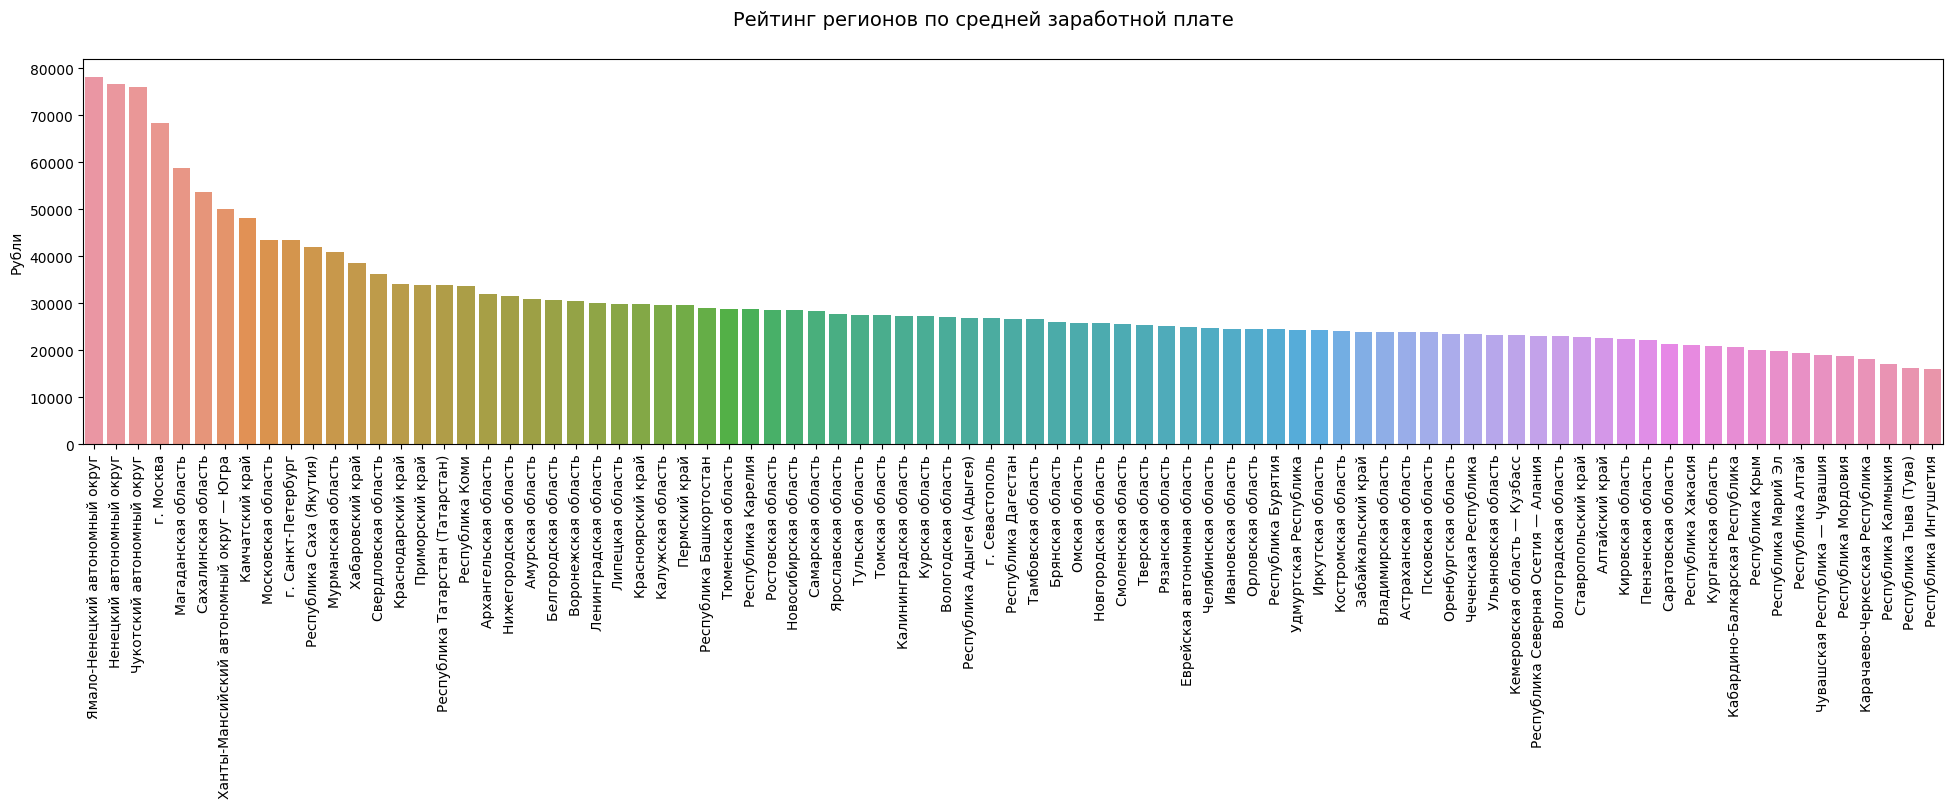

In [624]:
top_cash = df_region.sort_values(by='cash capita', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=top_cash, x=top_cash.index, y='cash capita')
fig.suptitle(
    'Рейтинг регионов по средней заработной плате',
    fontsize=14)
plt.xlabel('')
plt.ylabel('Рубли')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 [Text(0, 0, 'г. Москва'),
  Text(1, 0, 'Сахалинская область'),
  Text(2, 0, 'Московская область'),
  Text(3, 0, 'Свердловская область'),
  Text(4, 0, 'г. Санкт-Петербург'),
  Text(5, 0, 'Ямало-Ненецкий автономный округ'),
  Text(6, 0, 'Тюменская область'),
  Text(7, 0, 'Ханты-Мансийский автономный округ — Югра'),
  Text(8, 0, 'Краснодарский край'),
  Text(9, 0, 'Хабаровский край'),
  Text(10, 0, 'Республика Татарстан (Татарстан)'),
  Text(11, 0, 'Воронежская область'),
  Text(12, 0, 'Республика Саха (Якутия)'),
  Text(13, 0, 'Мурманская область'),
  Text(14, 0, 'Нижегородская область'),
  Text(15, 0, 'Архангел

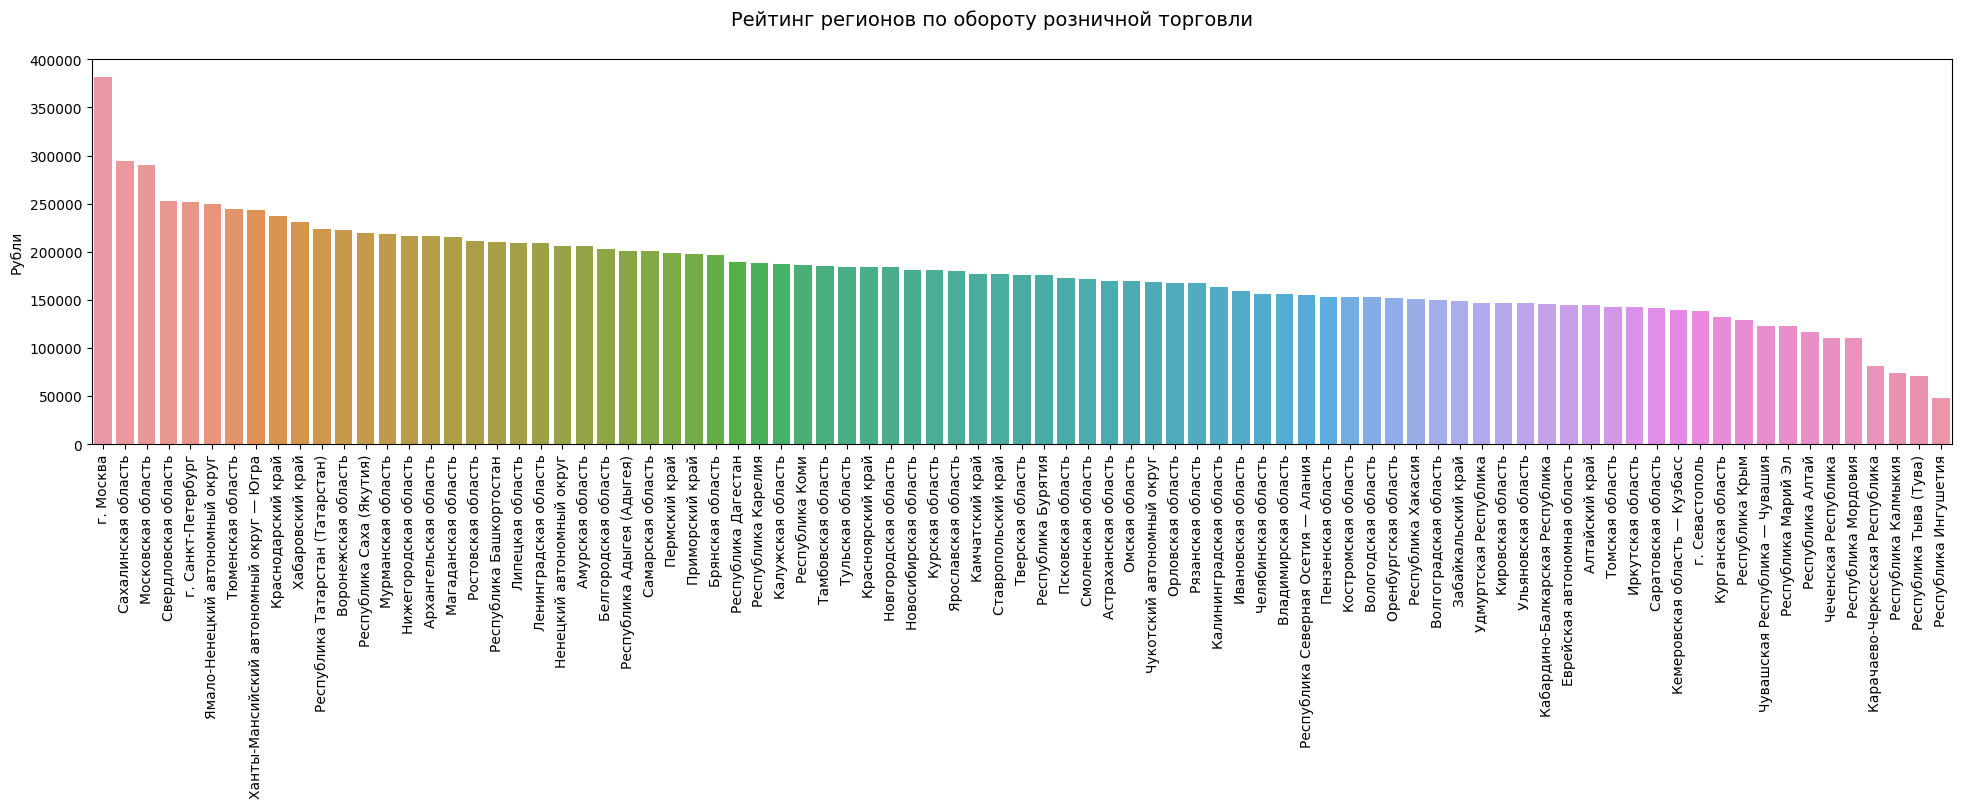

In [625]:
top_retail = df_region.sort_values(by='retail per capita', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=top_retail, x=top_retail.index, y='retail per capita')
fig.suptitle(
    'Рейтинг регионов по обороту розничной торговли',
    fontsize=14)
plt.xlabel('')
plt.ylabel('Рубли')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 [Text(0, 0, 'Республика Ингушетия'),
  Text(1, 0, 'Брянская область'),
  Text(2, 0, 'Республика Дагестан'),
  Text(3, 0, 'Ненецкий автономный округ'),
  Text(4, 0, 'Республика Калмыкия'),
  Text(5, 0, 'Республика Мордовия'),
  Text(6, 0, 'Воронежская область'),
  Text(7, 0, 'Тамбовская область'),
  Text(8, 0, 'Республика Адыгея (Адыгея)'),
  Text(9, 0, 'Смоленская область'),
  Text(10, 0, 'Чеченская Республика'),
  Text(11, 0, 'Астраханская область'),
  Text(12, 0, 'Республика Крым'),
  Text(13, 0, 'Оренбургская область'),
  Text(14, 0, 'Рязанская область'),
  Text(15, 0, 'Ставропольский край'),
  Text(16, 0, 

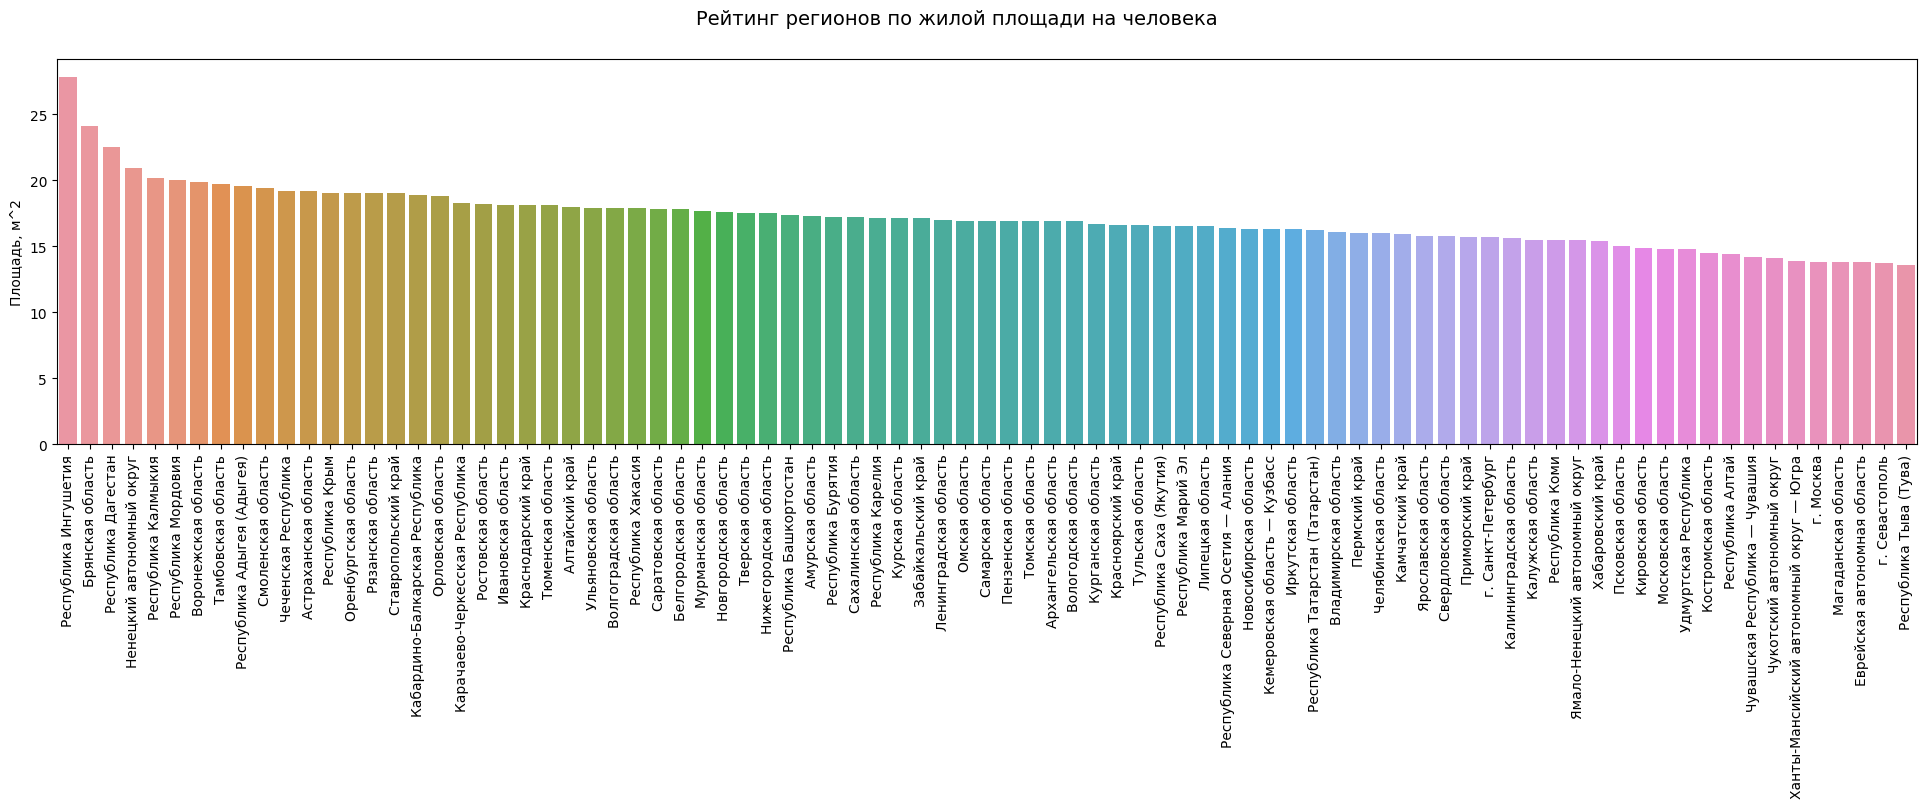

In [626]:
top_living_area = df_region.sort_values(by='living area', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=top_living_area, x=top_living_area.index, y='living area')
fig.suptitle(
    'Рейтинг регионов по жилой площади на человека',
    fontsize=14)
plt.xlabel('')
plt.ylabel('Площадь, м^2')
plt.xticks(rotation = 90)

В топ-3 по зарплатам стоят северные региона, из-за нефтегазовой отрасли, при этом по обороту розничной торговли значительно выделяется Моква, в то же время по наибольшей площади жилья выделяются регионы с более тёплым климатом, не считая Ненецкий автономный округ, ЯНАО, как и Москва тут в аутсайдерах.

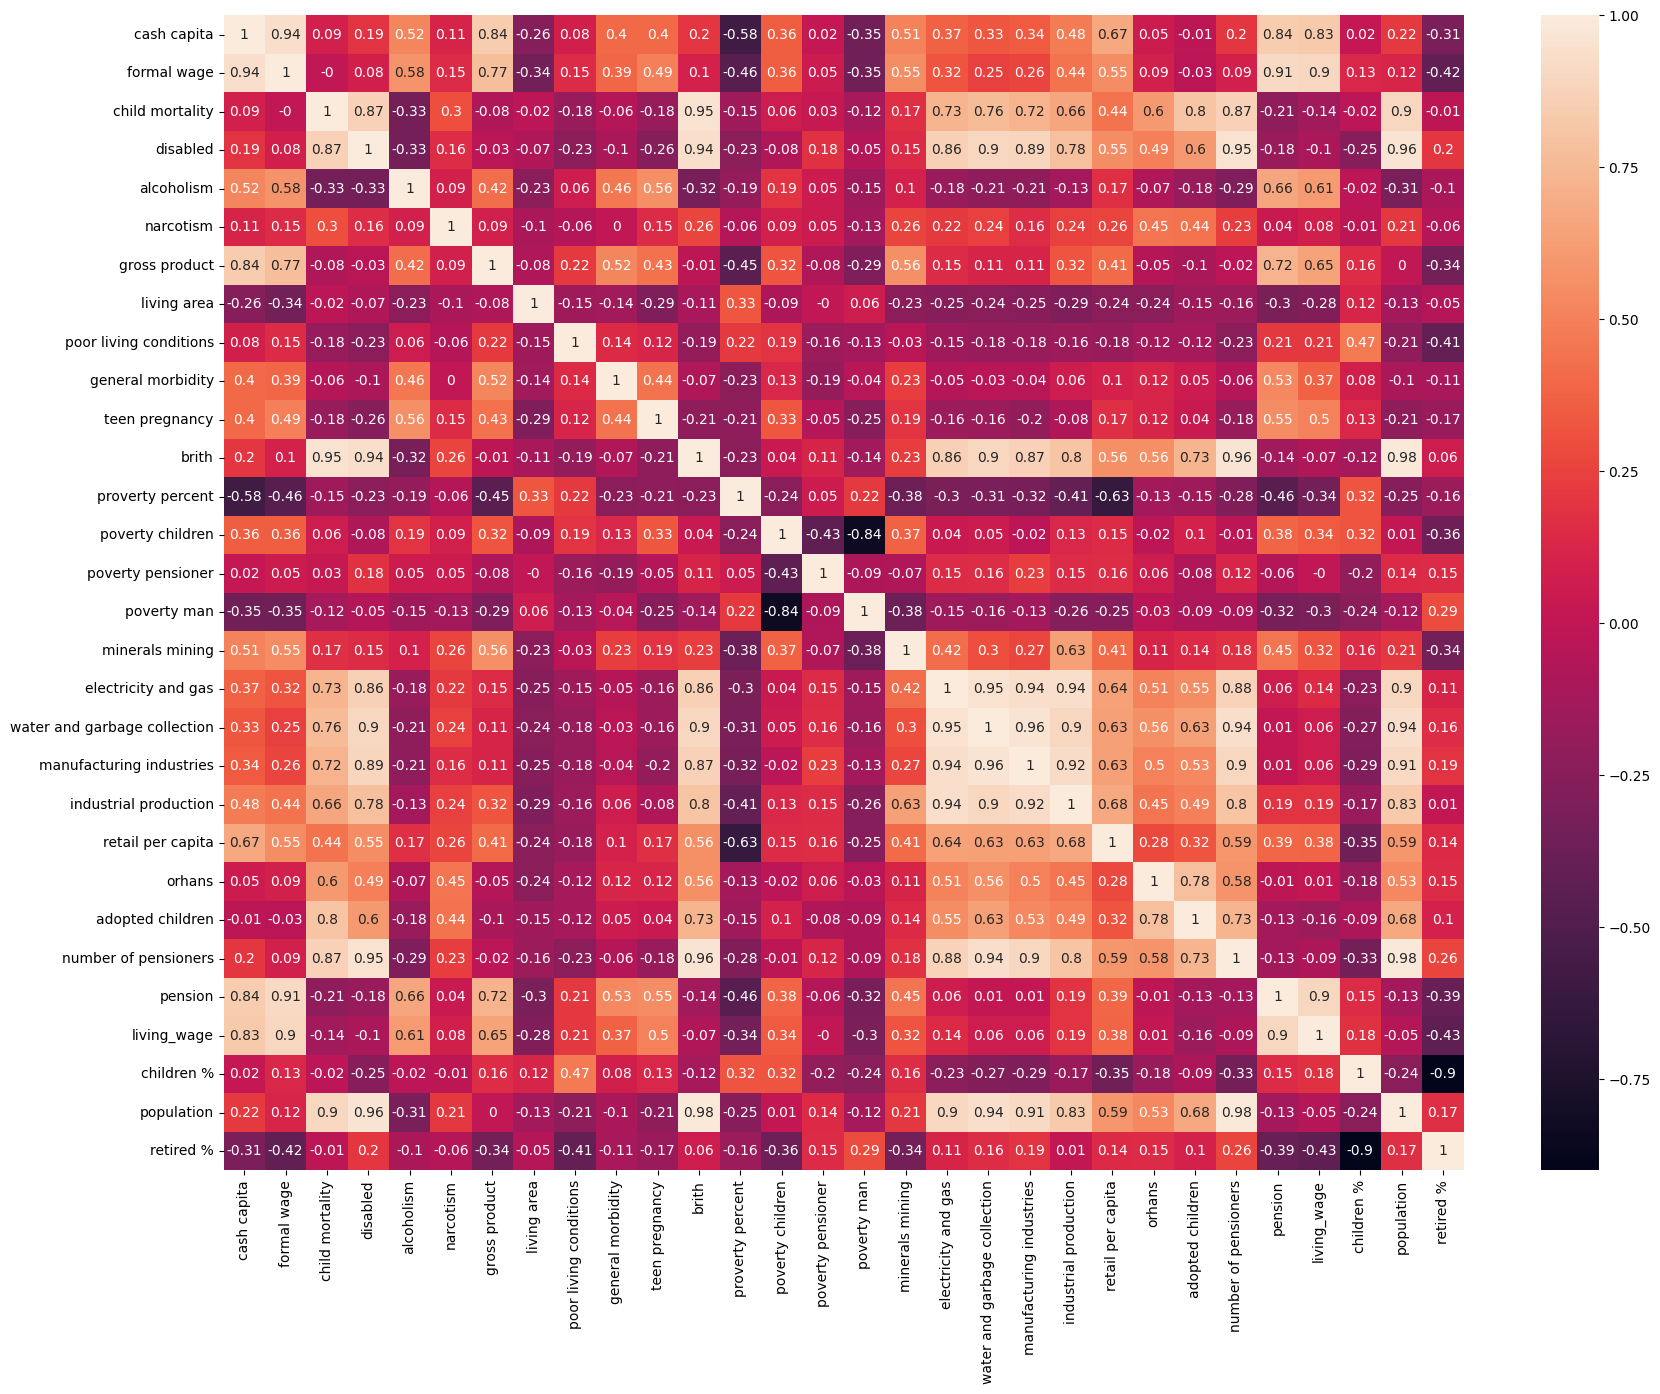

In [627]:
# Создадим тепловую карту, визуализирующую значения матрицы корреляции всех пар переменных
plt.figure(figsize=(20, 15))
sns.heatmap(df_region.corr().round(decimals=2), annot=True)
plt.show()

1. Все показатели "Объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами." имеют очень высокую корреляцию, от 0.9 до 0.95, из всех признаков достаточно будет оставить один.

2. Так же у признаков из прошлого пунка есть очень сильная корреляция с числом пенсионеров, с количеством инвалидов и с рождаемостью. Все эти признаки коррелируют с показателем более 0.9

3. Очень сильная обратная корреляция наблюдается среди количества детей и взрослых малоимущих. Бедные реже рожают?

4. Высокая обратная корреляция наблюдается между оборотом розничной торговли и процентом населения за чертой бедности, так же уровень среднемесячного дохода имеет сильну обратную корреляцию между процентом населения за чертой бедности.



In [628]:
df_region['cash capita norm'] = df_region['cash capita'] / df_region['living_wage']
df_region['formal wage norm'] = df_region['formal wage'] / df_region['living_wage']
df_region['retail norm'] = df_region['retail per capita'] / df_region['living_wage']

df_region.drop(columns=['cash capita', 'formal wage', 'retail per capita'], axis=1, inplace=True)

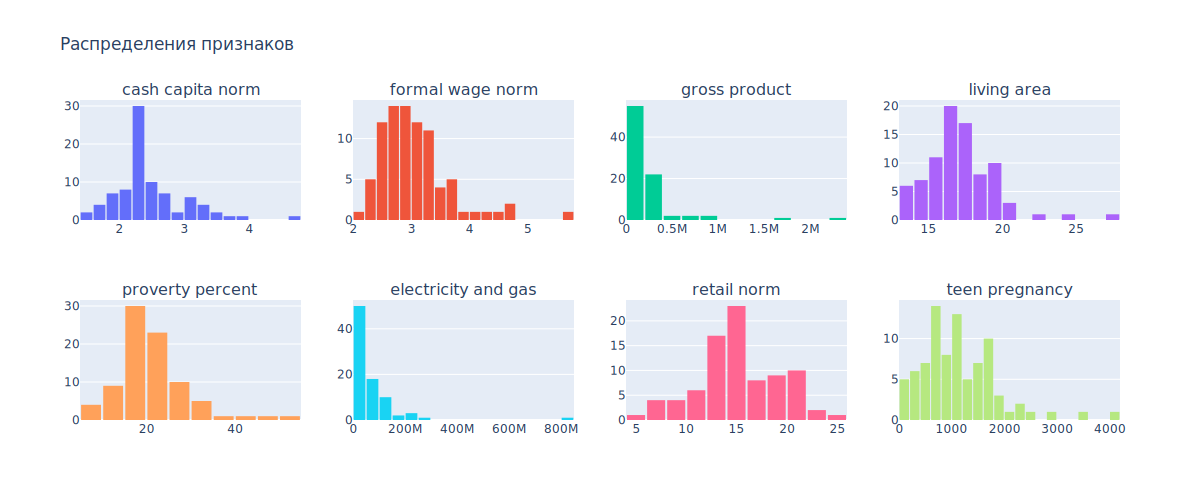

In [629]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

cols=['cash capita norm','formal wage norm','gross product','living area',
      'proverty percent','electricity and gas','retail norm', 'teen pregnancy']

# Создайте объект subplots
fig = make_subplots(rows=2, cols=4, subplot_titles=cols)

# Создайте гистограммы и добавьте их к объекту fig
for i, col in enumerate(cols):
    row = 1 if i < 4 else 2
    col_num = i % 4 + 1
    fig.add_trace(go.Histogram(x=df_region[col], nbinsx=20), row=row, col=col_num)

# Обновите макет и отобразите график
fig.update_layout(title='Распределения признаков',
                  showlegend=False, width=1200, height=500)
fig.layout.bargap = 0.1
fig.show('svg')

Признаки 'gross product' и 'electicity and gas' следует перевести в логарифмическую шкалу.

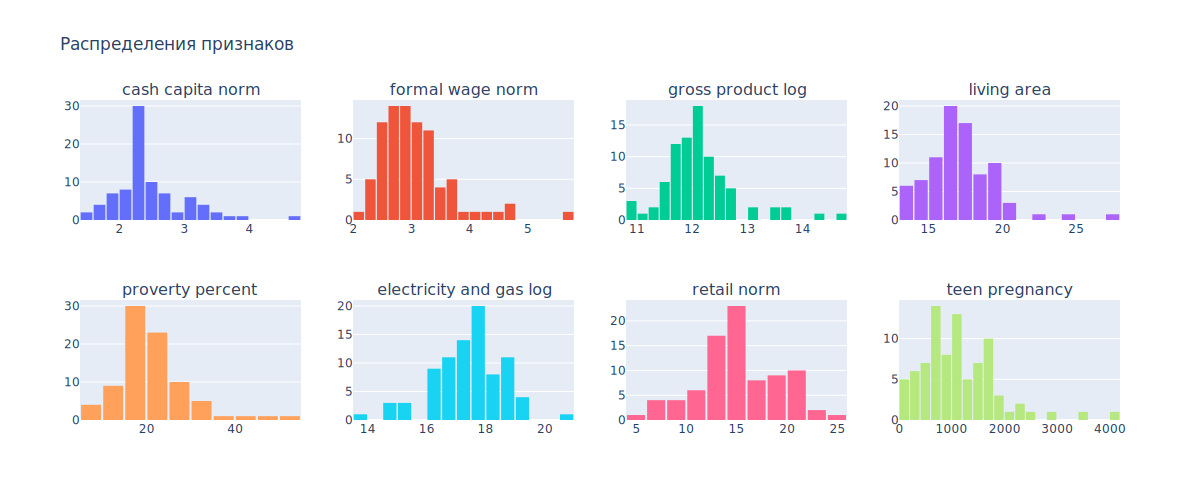

In [630]:
df_region['gross product log'] = np.log(df_region['gross product'])
df_region['electricity and gas log'] = np.log(df_region['electricity and gas'])
df_region.drop(columns=['gross product', 'electricity and gas'],axis=1, inplace=True)

cols=['cash capita norm','formal wage norm','gross product log','living area',
      'proverty percent','electricity and gas log','retail norm', 'teen pregnancy']

# Создайте объект subplots
fig = make_subplots(rows=2, cols=4, subplot_titles=cols)

# Создайте гистограммы и добавьте их к объекту fig
for i, col in enumerate(cols):
    row = 1 if i < 4 else 2
    col_num = i % 4 + 1
    fig.add_trace(go.Histogram(x=df_region[col], nbinsx=20), row=row, col=col_num)

# Обновите макет и отобразите график
fig.update_layout(title='Распределения признаков',
                  showlegend=False, width=1200, height=500)
fig.layout.bargap = 0.1
fig.show('svg')

In [631]:
#Упорядочим колонки

cols=['cash capita norm','formal wage norm','gross product log','living area',
      'proverty percent','electricity and gas log','retail norm', 'teen pregnancy']

df_region = df_region[cols].copy()

In [632]:
for col in df_region.columns:
    _, p = shapiro(df_region[col])
    print(f'{col}:   p-value = {p:.3f}')

cash capita norm:   p-value = 0.000
formal wage norm:   p-value = 0.000
gross product log:   p-value = 0.000
living area:   p-value = 0.000
proverty percent:   p-value = 0.000
electricity and gas log:   p-value = 0.342
retail norm:   p-value = 0.474
teen pregnancy:   p-value = 0.000


Данные распределены не нормально, к нормльному распределению больше всего приближены графики "electricity and gas log" и "retail norm"

Т.к. распределения не являются нормальными, рассмотрим рангову матрецу Спирмена и Кендалла

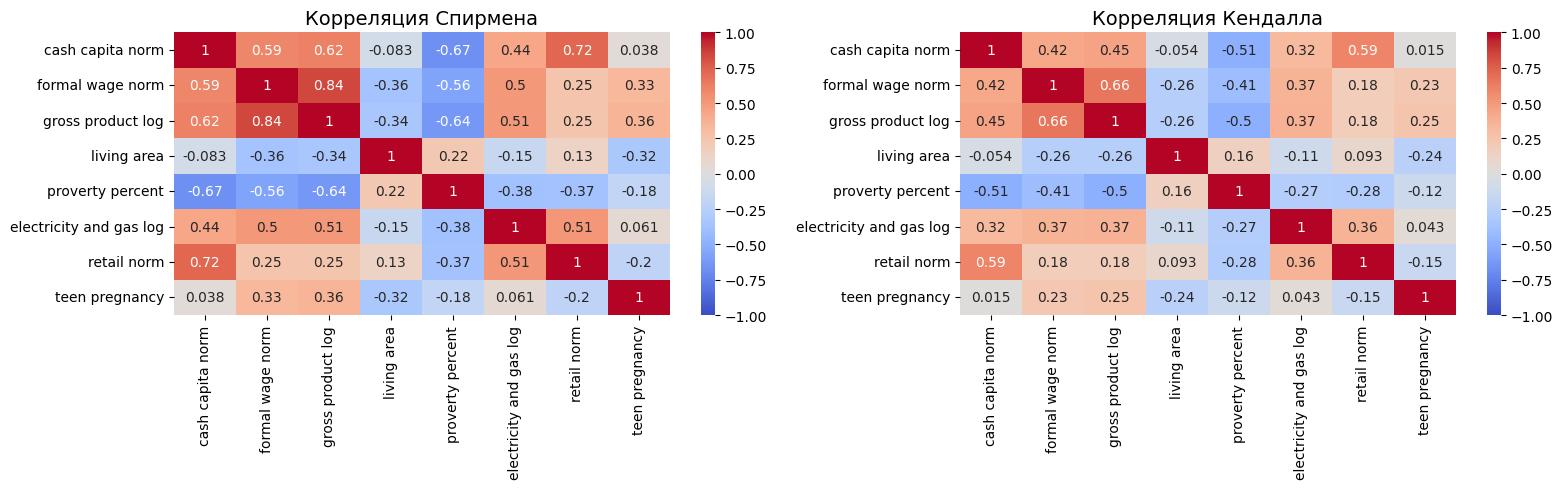

In [633]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.heatmap(df_region.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[0])
sns.heatmap(df_region.corr(method='kendall'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[1])
ax[0].set_title('Корреляция Спирмена', fontsize=14)
ax[1].set_title('Корреляция Кендалла', fontsize=14)
plt.tight_layout()

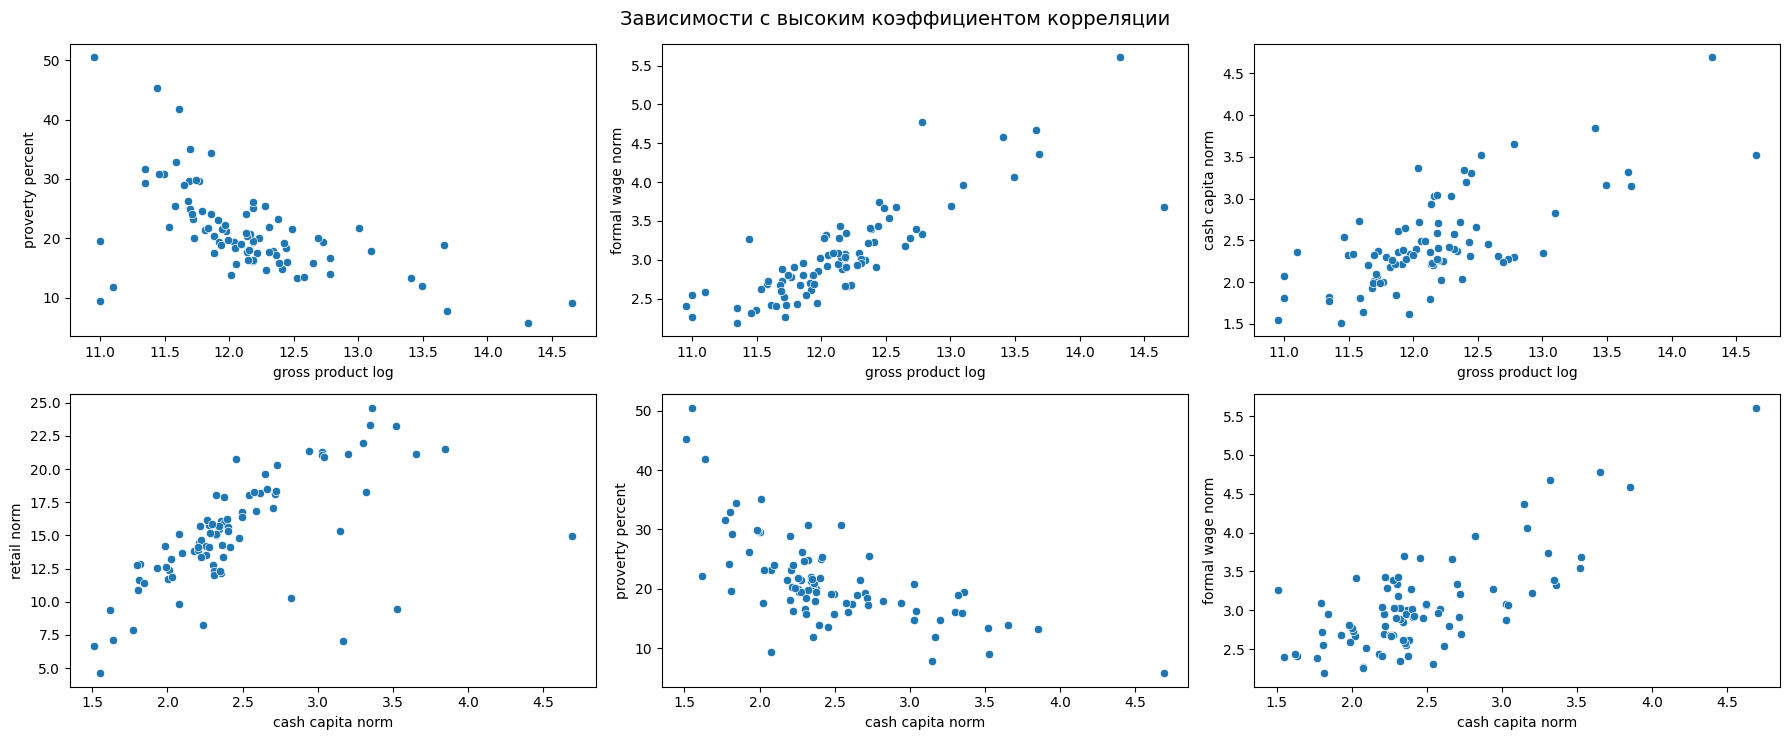

In [634]:
# Создайте сетку графиков
fig, axes = plt.subplots(2, 3, figsize=(18, 7.5))

# Список пар столбцов для создания scatterplot
pairs = [('gross product log', 'proverty percent'),
         ('gross product log', 'formal wage norm'),
         ('gross product log', 'cash capita norm'),
         ('cash capita norm', 'retail norm'),
         ('cash capita norm', 'proverty percent'),
         ('cash capita norm', 'formal wage norm')]

# Создайте графики в цикле
for i, pair in enumerate(pairs):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df_region, x=pair[0], y=pair[1], ax=axes[row, col])

# Установите общее заголовок
plt.suptitle('Зависимости с высоким коэффициентом корреляции', fontsize=14)

# Уточните макет
plt.tight_layout()

# Показать графики
plt.show()

Единственная очень высокая корреляция наблюдается между 'gross product log' и 'formal wage norm', корреляция составляет 82(по Кендаллу - 0.66), остальные признаки не поднимаются выше 0.72, считаю что удаление признаков не требуется.

Масштабируем признаки методом MinMaxScaler:

In [635]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_region)

### Кластеризация

Выберем количество кластеров, в качестве бащовой модели используем k-means

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default val

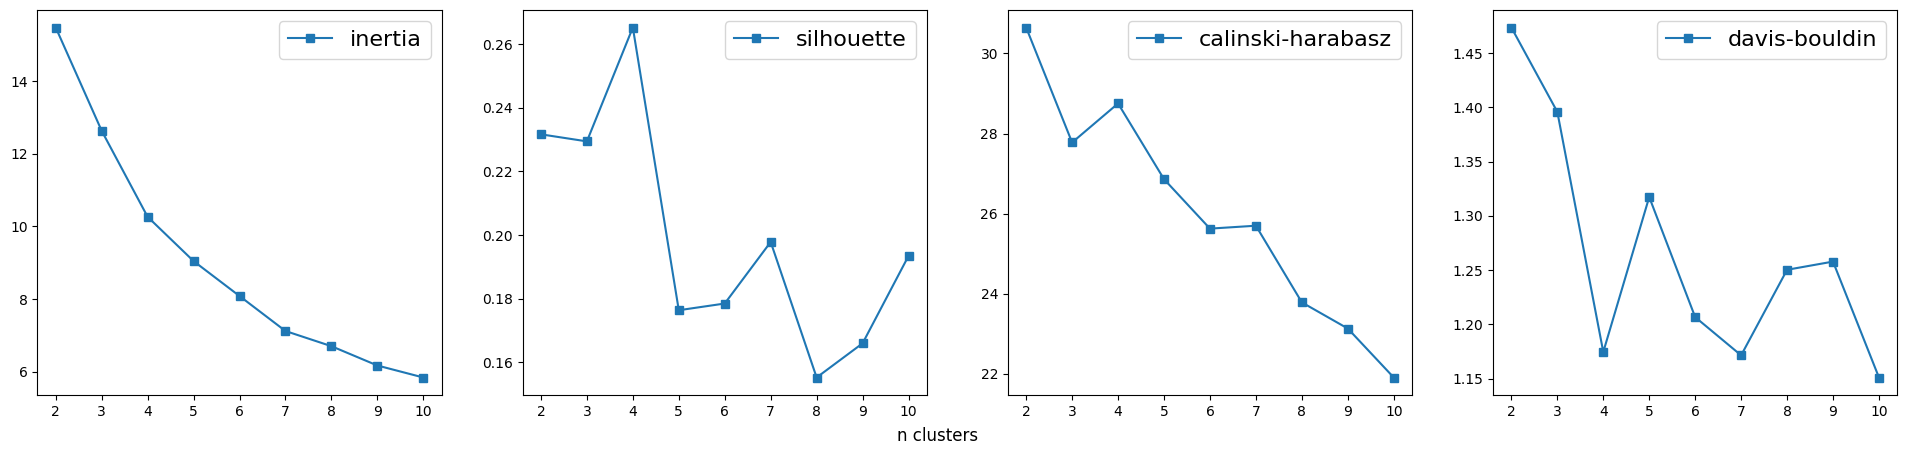

In [636]:
def plot_metrics(X):
    """Построение графиков кластеризации в зависимости от количества кластеров"""
    inertia = []
    silhouette = []
    calinski_harabasz = []
    davis_bouldin = []
    
    for n_cl in range(2, 11):
        kmeans = cluster.KMeans(n_clusters=n_cl, random_state=42)
        kmeans.fit(X)
    
        inertia.append(kmeans.inertia_)
        silhouette.append(metrics.silhouette_score(
            X, kmeans.labels_))
        calinski_harabasz.append(metrics.calinski_harabasz_score(
            X, kmeans.labels_))
        davis_bouldin.append(metrics.davies_bouldin_score(
            X, kmeans.labels_))
        
    fig, ax = plt.subplots(1, 4, figsize=(24,5))
    
    ax[0].plot(range(2, 11), inertia, 's-', label='inertia')
    ax[1].plot(range(2, 11), silhouette, 's-', label='silhouette')
    ax[2].plot(range(2, 11), calinski_harabasz, 's-', label='calinski-harabasz')
    ax[3].plot(range(2, 11), davis_bouldin, 's-', label='davis-bouldin')
    ax[0].legend(prop={'size': 16})
    ax[1].legend(prop={'size': 16})
    ax[2].legend(prop={'size': 16})
    ax[3].legend(prop={'size': 16});
    fig.supxlabel('n clusters')
    
        
plot_metrics(X)

Ориентируясь на методы, оптимальным значением количества кластеров будет 4. В качестве графического представления результатов кластеризации используем t-SNE преобразование пятимерного признакового пространства на плоскость. Выводим значения метрик качества кластеризации.

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette: 0.265
Calinski-Harabatz: 28.750
Davis-Bouldin: 1.175


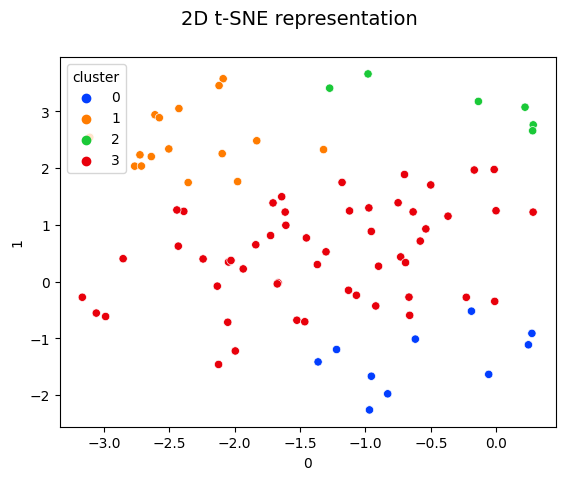

In [637]:
def plot_results(X, labels):
    "Построение 2D t-SNE представление и вычисление метрик"
    tsne = TSNE(n_components=2, perplexity=50, init='pca',
                learning_rate='auto', random_state=42)
    df_tsne = pd.DataFrame(tsne.fit_transform(X))
    df_tsne['cluster'] = labels
    fig = plt.figure()
    sns.scatterplot(x=df_tsne[0], y=df_tsne[1],
                    hue=df_tsne['cluster'], palette='bright')
    fig.suptitle('2D t-SNE representation', fontsize=14);

    print('Silhouette: {:.3f}'.format(
        metrics.silhouette_score(X, labels)))
    print('Calinski-Harabatz: {:.3f}'.format(
        metrics.calinski_harabasz_score(X, labels)))
    print('Davis-Bouldin: {:.3f}'.format(
        metrics.davies_bouldin_score(X, labels)))
        

kmeans = cluster.KMeans(n_clusters=4, random_state=42)
bm_labels = kmeans.fit_predict(X)
plot_results(X, bm_labels)

Понижение размерности

Число главных компонент: 5


d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default val

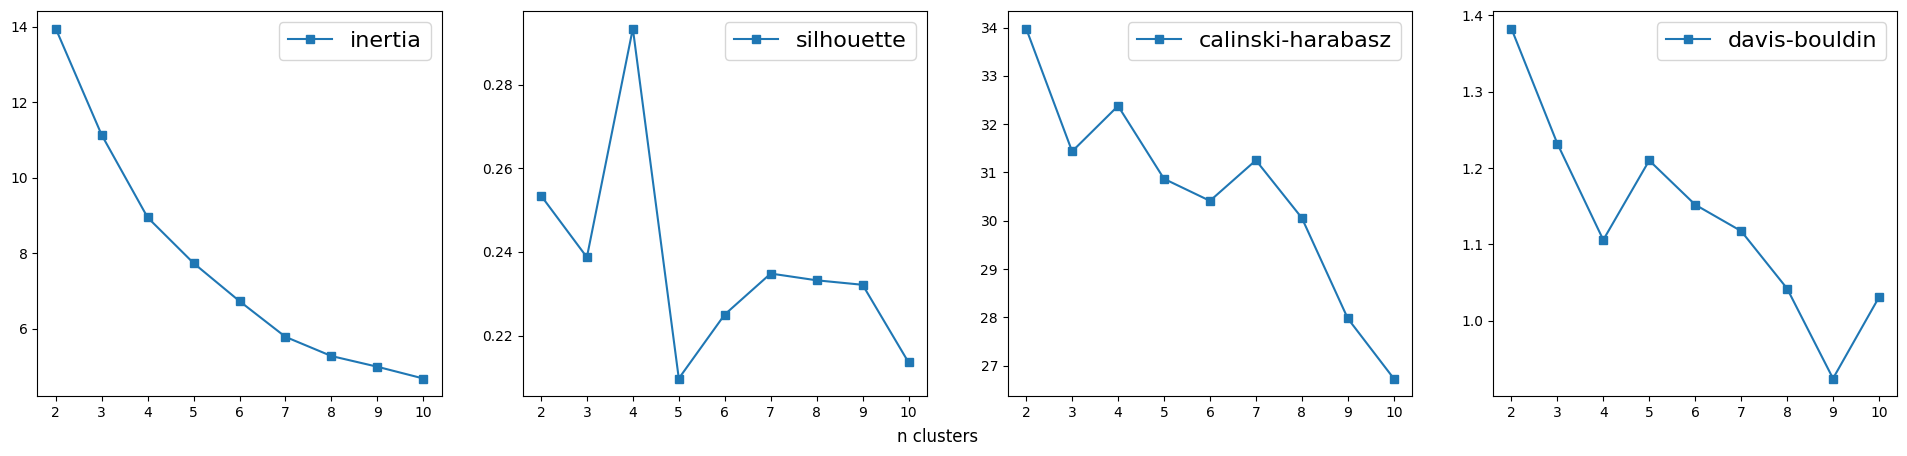

In [638]:
pca = PCA(n_components=0.9)  # 90% of explained dispersion
X_pca = pca.fit_transform(X)
print(f'Число главных компонент: {pca.n_components_}')

plot_metrics(X_pca)

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette: 0.293
Calinski-Harabatz: 32.378
Davis-Bouldin: 1.106
Rand score (сравнение с базовой моделью): 0.994118


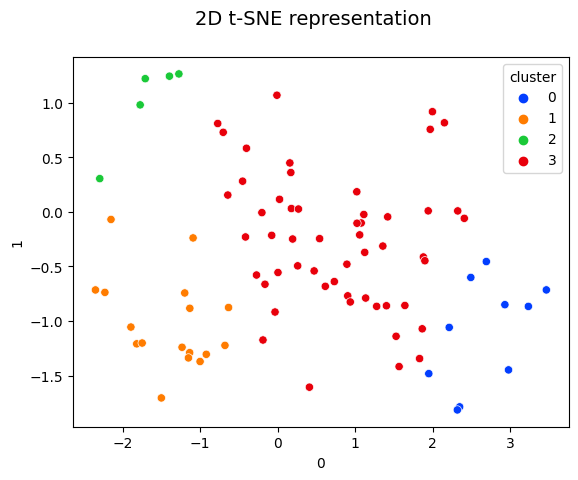

In [639]:
kmeans_pca = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit_predict(X_pca)
plot_results(X_pca, kmeans_pca.labels_)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, kmeans_pca.labels_)))

Опираясь на метод локтя и силуета оставляем количество кластеров равное 4. Метрики показывают лучшее качество, по сравнению с базовой моделью.

In [640]:
fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    title='Кластеры в пространстве трех главных компонент (PCA)',
    color=kmeans_pca.labels_, width=650, height=400)
fig.update_traces(marker={'size':3}, marker_line_width=0.5)
fig.show()

### Тестирование различных алгоритмов кластеризации,валидация

Используем данные после PCA-преобразования: массив X_pca. Количество кластеров оставляем равным четырем.

Silhouette: 0.337
Calinski-Harabatz: 28.938
Davis-Bouldin: 0.920
Rand score (сравнение с базовой моделью): 0.804762


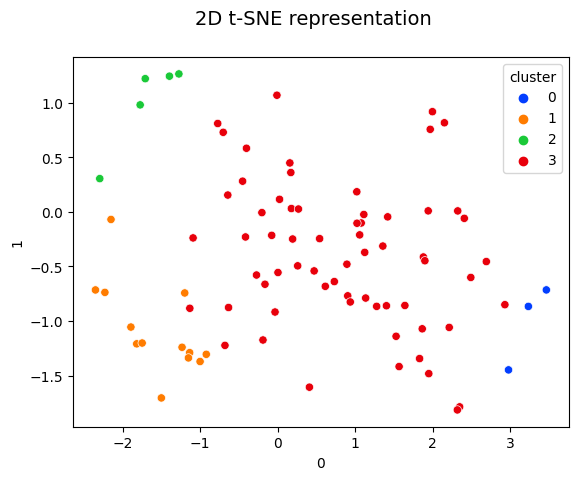

In [641]:
# Гауссова смесь, наилучший вариант: covariance_type='tied'
gmix = GaussianMixture(
    n_components=4, random_state=42, covariance_type='tied')
labels = gmix.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Silhouette: 0.189
Calinski-Harabatz: 27.177
Davis-Bouldin: 1.391
Rand score (сравнение с базовой моделью): 0.787115


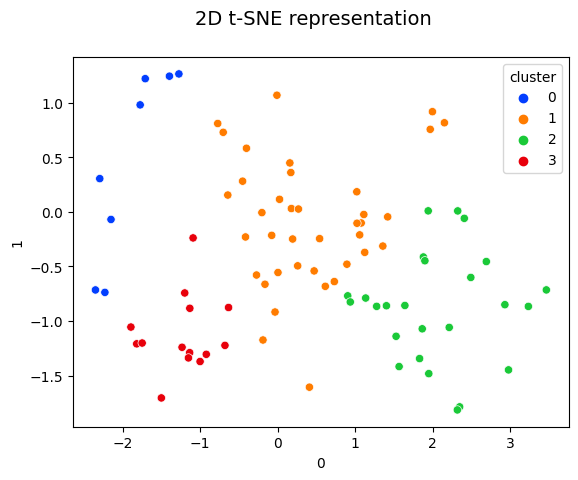

In [642]:
# Агломеративная кластеризация, наилучший вариант: linkage='ward'
tree_like = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = tree_like.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Silhouette: 0.186
Calinski-Harabatz: 25.409
Davis-Bouldin: 0.830
Rand score (сравнение с базовой моделью): 0.643978


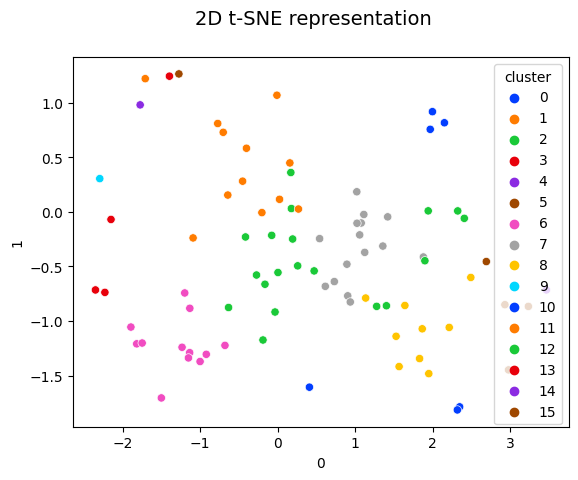

In [643]:
# Метод распространения близости
aff_prop = cluster.AffinityPropagation(damping=0.9, random_state=42)
labels = aff_prop.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Silhouette: 0.286
Calinski-Harabatz: 27.251
Davis-Bouldin: 1.022
Rand score (сравнение с базовой моделью): 0.766387


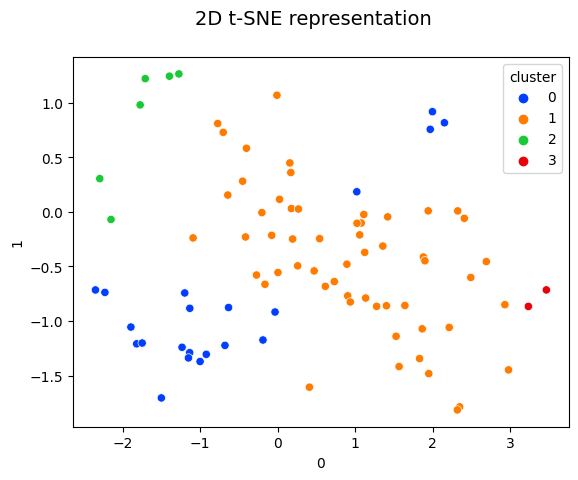

In [644]:
spectral = cluster.SpectralClustering(n_clusters=4)
labels = spectral.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Гауссовская смесь показывает наилучший коэффициент силуета. Лучший коэффцииент Calinski-Harabatz показывает метод k-mean на PCA-признаках. Лучший коэффициент Davis-Bouldin показывает метод распространения близости.

Индексы Рэнда при сравнении с базовой моделью остаются достаточно высокими, что говорит об устойчивости общей структуры распределения объектов по кластерам при использовании разных алгоритмов.

Нет явного лидера среди методов, остановимся на Гауссовской смеси.

In [645]:
# Гауссова смесь, наилучший вариант: covariance_type='tied'
gmix = GaussianMixture(
    n_components=4, random_state=42, covariance_type='tied')
labels_gmix = gmix.fit_predict(X_pca)
df['cluster'] = labels_gmix

# Упорядочим нумерацию кластеров 
df['cluster'] = df['cluster'].replace({2:0, 0:1, 3:2, 1:3})
df.to_csv('data/regions_cluster.csv')
df['cluster'].to_csv('data/labels.csv')

fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    title='Кластеры в пространстве трех главных компонент (PCA)',
    color=df['cluster'], width=650, height=400)
fig.update_traces(marker={'size':3}, marker_line_width=0.5)
fig.show()

In [646]:
df

,cash capita,formal wage,child mortality,disabled,alcoholism,narcotism,gross product,living area,poor living conditions,general morbidity,...,orhans,adopted children,number of pensioners,pension,living_wage,children %,population,cluster,formal wage norm,retail norm
region,,,,,,,,,,,,,,,,,,,,,
Белгородская область,30692.500000,30920.333333,139.21875,2.155028e+06,76.475000,4.216667,244680.468,17.8,0.4,72686.75,...,215.250,249.375,414591.142857,16606.24,9593.0,18.310386,1541259.0,3,3.223218,21.160800
Брянская область,26015.500000,26399.166667,154.40625,1.131007e+06,169.416667,14.050000,123532.820,24.1,0.0,77822.60,...,350.500,322.000,291857.571429,16274.25,10950.0,18.620793,1182682.0,2,2.410883,17.918691
Владимирская область,23908.333333,29127.166667,142.78125,1.318312e+06,121.350000,9.741667,149340.336,16.1,0.0,93964.65,...,408.500,485.625,396645.142857,16415.19,10808.0,17.989794,1342099.0,2,2.694964,14.464851
Воронежская область,30422.833333,30077.000000,216.31250,2.291732e+06,129.575000,16.508333,168933.316,19.9,0.1,54782.65,...,207.375,644.500,627980.714286,15589.71,9053.0,17.079093,2305608.0,3,3.322324,24.625195
Ивановская область,24567.833333,24856.666667,116.25000,8.287487e+05,154.691667,10.558333,98471.104,18.1,0.9,88113.70,...,402.625,282.500,281335.000000,15864.25,10581.0,17.835351,987032.0,2,2.349179,15.064476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,30861.500000,41014.333333,174.84375,6.893337e+05,119.933333,25.683333,196049.812,17.3,0.3,83665.50,...,744.500,582.375,187448.428571,17101.09,13530.0,22.211413,781846.0,2,3.031362,15.215595
Магаданская область,58826.833333,82467.500000,26.43750,5.328867e+04,346.141667,20.566667,488520.872,13.8,0.0,68714.80,...,230.250,59.125,40223.000000,24535.98,20830.0,20.632775,139034.0,0,3.959073,10.313213
Сахалинская область,53568.333333,75366.833333,68.25000,2.282195e+05,315.025000,29.800000,860733.340,17.2,0.0,82027.20,...,299.000,263.625,145305.571429,21655.01,16130.0,21.016274,485621.0,0,4.672463,18.265516


На основе подготовленного набора данных по регионам России были выбраны критерии для их группировки в группы со схожими характеристиками, основанные на социально-экономическом благополучии субъектов федерации. Были составлены рейтинги регионов согласно выбранным параметрам. Были изучены распределения выбранных критериев и корреляции между ними, был осуществлен отбор и проведены необходимые преобразования. Окончательный модельный набор данных для кластеризации состоит из 8 независимых индикаторов:

-  Заработная плату, нормализованную на прожиточный минимум региона
- Среднемесячный денежный доход на человека, нормализованный на прожиточный минимум региона
- Валовый  региональный продукт на душу населения
- Жилая площадь на душу населения
- Процент населения за чертой бедности
- Показатель обеспечения электроенергией, газом и паром.
- Оборот розничной торговли на душу населения, нормализованный на прожиточный минимум региона
- Подростковая беременность

При помощи различных внутренних метрик кластеризации было оценено оптимальное число кластеров (4). Была построена базовая модель (k-means). Было выполнено понижение размерности методом PCA (3 главные компоненты, объясняющие 90% дисперсии). Были протестированы различные методы кластеризации; на основе показателей и визуализации пространства признаков был выбран оптимальный ("гауссова смесь на PCA-компонентах"), регионам присвоены соответствующие метки. Продемонстрирована устойчивость общей структуры кластеров при использовании различных алгоритмов кластеризации. При необходимости в качестве альтернативы можно также использовать k-means на PCA-компонентах, дающий похожие значения метрик и несколько большее число финансово неблагополучных регионов.

## 3. Анализ результатов кластеризации

In [647]:
from scipy.stats import kruskal, mannwhitneyu

In [648]:
cluster = pd.read_csv(
    'data/regions_cluster.csv', index_col='region')
cluster['cluster']
df = pd.read_csv('data/regions.csv', index_col='region')
df = df.join(cluster['cluster'])

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Белгородская область to Чукотский автономный округ
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cash capita                   85 non-null     float64
 1   formal wage                   85 non-null     float64
 2   child mortality               85 non-null     float64
 3   disabled                      85 non-null     float64
 4   alcoholism                    85 non-null     float64
 5   narcotism                     85 non-null     float64
 6   gross product                 85 non-null     float64
 7   living area                   85 non-null     float64
 8   poor living conditions        85 non-null     float64
 9   general morbidity             85 non-null     float64
 10  teen pregnancy                85 non-null     float64
 11  brith                         85 non-null     float64
 12  proverty percent            

In [650]:
df['cluster'].value_counts().sort_index()

0     5
1     3
2    64
3    13
Name: cluster, dtype: int64

Большинство регионов попадает во второй кластер.

Рассмотри отлиия кластеров с помощью полярной диаграммы по медианным значениям.

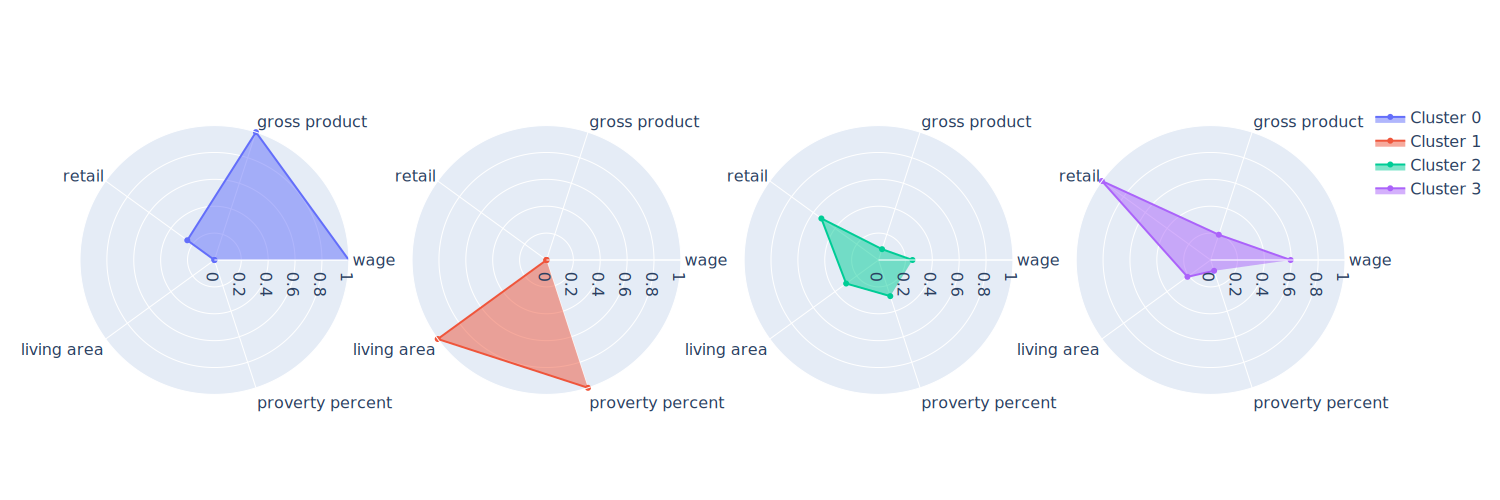

In [651]:
df['formal wage norm'] = df['formal wage'] / df['living_wage']
df['retail norm'] = df['retail per capita'] / df['living_wage']

cols = ['formal wage norm', 'gross product', 'retail norm', 'living area', 'proverty percent']
medians = df.groupby('cluster')[cols].median()

medians.rename(
    {'formal wage norm': 'wage', 'retail norm': 'retail'}, 
    axis=1, inplace=True)
features = medians.columns
scaler = MinMaxScaler()
medians_scaled = pd.DataFrame(scaler.fit_transform(medians), 
                              columns=features)

fig = make_subplots(rows=1, cols=4, specs=[[{'type': 'polar'}]*4]*1)

fig.add_trace(go.Scatterpolar(  
    name = 'Cluster 0',
    r = medians_scaled.loc[0].values,
    theta = features,
    fill='toself',
    ), 1, 1)

fig.add_trace(go.Scatterpolar(
    name = 'Cluster 1',
    r = medians_scaled.loc[1].values,
    theta = features,
    fill='toself'
    ), 1, 2)

fig.add_trace(go.Scatterpolar(
    name = 'Cluster 2',
    r = medians_scaled.loc[2].values,
    theta = features,
    fill='toself'
    ), 1, 3)

fig.add_trace(go.Scatterpolar(
    name = "Cluster 3",
    r = medians_scaled.loc[3].values,
    theta = features,
    fill='toself'
    ), 1, 4)

fig.update_polars(radialaxis=dict(range=[0, 1]))
fig.update_layout(
    font_size=16,
    showlegend=True, # отображение легенды
    autosize=False, # устаналиваем свои размеры графика
    width=1500, 
    height=500) 
fig.show('svg')

In [652]:
display('Медианные значения в числовом выражении:', medians)

'Медианные значения в числовом выражении:'

,wage,gross product,retail,living area,proverty percent
cluster,,,,,
0,4.061176,860733.340,10.313213,15.5,11.938462
1,2.410307,92912.776,6.657569,20.2,45.311538
2,2.827441,157884.150,14.358823,16.9,21.371154
3,3.393070,244680.468,21.308167,16.5,14.757692


In [653]:
df[df['cluster'] == 0].index

Index(['Ненецкий автономный округ', 'Ямало-Ненецкий автономный округ',
       'Магаданская область', 'Сахалинская область',
       'Чукотский автономный округ'],
      dtype='object', name='region')

Кластер 0 - Северные регионы, наибольший уровень заработной платы, наибольший валовый региональный продукт, самый низкий процент бедного населений. Но вместе с этим наименьшая жилая площадь на человека и средний показатель розничной торговли.

In [654]:
df[df['cluster'] == 1].index

Index(['Республика Калмыкия', 'Республика Ингушетия',
       'Республика Тыва (Тува)'],
      dtype='object', name='region')

Кластер 1 - самый низкий средний доход на человека, большой процент бедности, розничная торговля и валовый региональный продукт на самом низком уровне. Но вместе с этим самая большая средняя плозадь на человека. 

In [655]:
df[df['cluster'] == 2].index

Index(['Брянская область', 'Владимирская область', 'Ивановская область',
       'Калужская область', 'Костромская область', 'Курская область',
       'Орловская область', 'Рязанская область', 'Смоленская область',
       'Тамбовская область', 'Тверская область', 'Тульская область',
       'Ярославская область', 'Республика Карелия', 'Республика Коми',
       'Архангельская область', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'Республика Адыгея (Адыгея)', 'Республика Крым', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Кабардино-Балкарская Республика',
       'Карачаево-Черкесская Республика',
       'Республика Северная Осетия — Алания', 'Чеченская Республика',
       'Ставропольский край', 'Республика Марий Эл', 'Республика Мордовия',
       'Удмуртская Республика', 'Чувашская Республика

Кластер 2 - самый объёмный кластер, средний по России. Зарплата почти 2.9 прожиточных минимума, относительно низкий валовый регионалбный продукт, высокий показатель розничной торговли, процент нищих - 1/5 населения. Средний показатель по жилой площади на человека.

In [656]:
df[df['cluster'] == 3].index

Index(['Белгородская область', 'Воронежская область', 'Липецкая область',
       'Московская область', 'г. Москва', 'г. Санкт-Петербург',
       'Краснодарский край', 'Республика Башкортостан',
       'Республика Татарстан (Татарстан)', 'Нижегородская область',
       'Свердловская область', 'Ханты-Мансийский автономный округ — Югра',
       'Тюменская область'],
      dtype='object', name='region')

Кластер 3 - Болшинство регионов находится в центрально часте россии, но так же есть несколько регионов с Урала. Довольно высокий уровень зарплаты, относительно высокий валовый региональный продукт, уровень бедности - 15%. Самый высокий показатель розничной торговли, средний показатель по жилой площади на человека.

Проведем статистическую оценку значимости обнаруженных различий. Как было продемонстрировано в предыдущей части данного проекта, распределения исследуемых показателей не являются нормальными, а число сравниваемых групп превышает две. В данном случае можно использовать непараметрический критерий Краскела - Уоллиса.

In [657]:
def kruskal_pvalue(df, col):
    "p-value для заданной колонки (значимость различий по 4-м кластерам)"
    v0 = df[df['cluster'] == 0][col]
    v1 = df[df['cluster'] == 1][col]
    v2 = df[df['cluster'] == 2][col]
    v3 = df[df['cluster'] == 3][col]
    _, p = kruskal(v0, v1, v2, v3)
    return p


cols = ['formal wage', 'gross product', 'retail per capita', 'living area', 'proverty percent']
for col in cols:
    print(f'{col}:   p-value = {kruskal_pvalue(df, col):.3f}')

formal wage:   p-value = 0.000
gross product:   p-value = 0.000
retail per capita:   p-value = 0.000
living area:   p-value = 0.482
proverty percent:   p-value = 0.000


Необходимо также проверить, насколько оправдано выделение региона в отдельный кластер 0, сравнив эту группу с кластером 2 обычных регионов по критерию Манна-Уитни. Как мы видим, эти две группы действительно существенно отличаются по всем параметрам, кроме размера жилой площади.

In [658]:
def mannwhitney_pvalue(df, col, cl_couple):
    "p-value для пары кластеров (cl_couple) по заданной колонке"
    v0 = df[df['cluster'] == cl_couple[0]][col]
    v1 = df[df['cluster'] == cl_couple[1]][col]
    _, p = mannwhitneyu(v0, v1)
    return p


cols = ['formal wage', 'gross product', 'retail per capita', 'living area', 'proverty percent']
for col in cols:
    print(f'{col}:   p-value = {mannwhitney_pvalue(df, col, (0, 2)):.3f}')

formal wage:   p-value = 0.000
gross product:   p-value = 0.000
retail per capita:   p-value = 0.003
living area:   p-value = 0.282
proverty percent:   p-value = 0.001


### Группы населения, сталкивающиеся с бедностью

In [659]:
cols =[
    'poverty children',
    'poverty man', 
    'poverty pensioner']
df[cols].mean()

poverty children     38.945882
poverty man          55.597647
poverty pensioner     5.631765
dtype: float64

In [664]:
socgroups = df[[
    'population', 'proverty percent', 'poverty children',
    'poverty pensioner', 'poverty man', 
    'children %', 'retired %']].copy()

# Процент трудоспособных
socgroups['employable %'] = (
    100 - socgroups['children %'] - socgroups['retired %']) 

# Количество малоимущих
socgroups['the poor'] = (socgroups['population'] 
    * socgroups['proverty percent'] / 100).round(0).astype(int)  

# Количество людей в социально-демографических группах
socgroups['children'] = (
    (socgroups['population'] * socgroups['children %'] / 100)
    .round(0).astype(int))  
socgroups['employable'] = (
    (socgroups['population'] * socgroups['employable %'] / 100)
    .round(0).astype(int))  
socgroups['retired'] = (
    (socgroups['population'] * socgroups['retired %'] / 100)
    .round(0).astype(int))  

# Количество малоимущих в социально-демографических группах
socgroups['poor children'] = (  
    (socgroups['the poor'] * socgroups['poverty children'] / 100)
    .round(0).astype(int))
socgroups['poor employable'] = (  
    (socgroups['the poor'] * socgroups['poverty man'] / 100)
    .round(0).astype(int))   
socgroups['poor retired'] = (  
    (socgroups['the poor'] * socgroups['poverty pensioner'] / 100)
    .round(0).astype(int))    

# Процент малоимущих в социально-демографических группах
socgroups['poor children %'] = (
    (socgroups['poor children'] / socgroups['children'] * 100))  
socgroups['poor employable %'] = (  
    (socgroups['poor employable'] / socgroups['employable'] * 100))  
socgroups['poor retired %'] = ( 
    (socgroups['poor retired'] / socgroups['retired'] * 100))  

# Среднее по РФ
cols =[
    'poor children %',
    'poor employable %', 
    'poor retired %']
poor_percent = socgroups[cols].mean()
poor_percent

poor children %      38.848007
poor employable %    21.964868
poor retired %        5.316254
dtype: float64

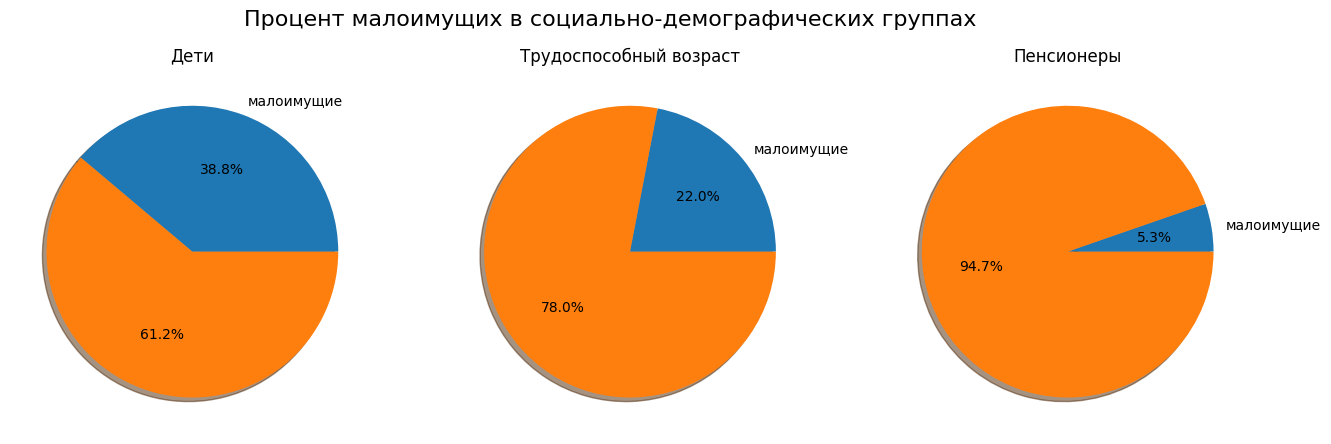

In [665]:
labels = ['малоимущие', '']
fig, ax = plt.subplots(1, 3, figsize=(16,5))
ax[0].pie([poor_percent[0], 100-poor_percent[0]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[1].pie([poor_percent[1], 100-poor_percent[1]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[2].pie([poor_percent[2], 100-poor_percent[2]], 
          labels=labels, autopct='%1.1f%%', shadow=True);
ax[0].set_title('Дети')
ax[1].set_title('Трудоспособный возраст')
ax[2].set_title('Пенсионеры')
fig.suptitle('Процент малоимущих в социально-демографических группах', fontsize=16)
fig.set_facecolor('white');

In [666]:
socgroups['cluster'] = df['cluster']
cluster_socgroups = (socgroups
    .groupby('cluster')[['children', 'employable', 'retired', 'poor children',	
                         'poor employable', 'poor retired']].sum())

cluster_socgroups['poor children %'] = (cluster_socgroups['poor children'] 
                                        / cluster_socgroups['children'] * 100)  
cluster_socgroups['poor employable %'] = (cluster_socgroups['poor employable'] 
                                  / cluster_socgroups['employable'] * 100)  
cluster_socgroups['poor retired %'] = (cluster_socgroups['poor retired'] 
                                       / cluster_socgroups['retired'] * 100) 
cluster_socgroups

,children,employable,retired,poor children,poor employable,poor retired,poor children %,poor employable %,poor retired %
cluster,,,,,,,,,
0,298309,746825,220446,73492,73176,14425,24.636199,9.798279,6.543553
1,353682,603599,158635,204694,286358,31827,57.875153,47.441762,20.063038
2,18364718,48310932,22101396,7326743,10831287,1039208,39.895756,22.419950,4.702002
3,10392224,30574832,14045408,3350393,4501434,610298,32.239422,14.722678,4.345178


Посмотрим на аналогичные показатели по кластерам. 
В целом показатели зависят от кластера, чем бедней регионы в кластере, тем выше процент малоимущих. Но в 0 кластере, с северными регионами выше показатель малоимущих людей на пенсии. Возможно просто выброс. В самом бедном кластере - 1, процент малоимущих выше в разы, относительно других кластеров.

### Взаимосвязь численности социально-демографических групп с уровнем бедности

,children,employable,retired,poor children,poor employable,poor retired,poor children %,poor employable %,poor retired %,population,children %,employable %,retired %
cluster,,,,,,,,,,,,,
0,298309,746825,220446,73492,73176,14425,24.636199,9.798279,6.543553,1265581,23.570913,59.010447,17.418561
1,353682,603599,158635,204694,286358,31827,57.875153,47.441762,20.063038,1115916,31.694321,54.090003,14.215676
2,18364718,48310932,22101396,7326743,10831287,1039208,39.895756,22.419950,4.702002,88777053,20.686334,54.418265,24.895393
3,10392224,30574832,14045408,3350393,4501434,610298,32.239422,14.722678,4.345178,55012465,18.890671,55.578008,25.531319


Нулевая гипотеза: процент детей в разных кластерах одинаков
chi-square test p-value = 0.0


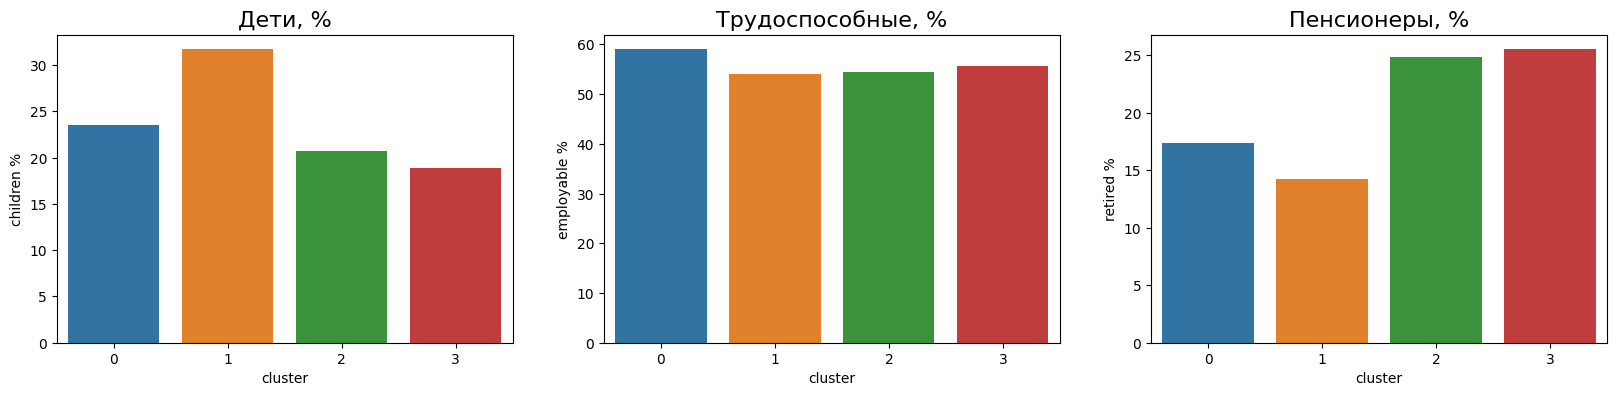

In [669]:
cluster_socgroups['population'] = (df.groupby('cluster')['population']
                                   .sum().astype(int))
cluster_socgroups['children %'] = (cluster_socgroups['children'] 
                                   /  cluster_socgroups['population'] * 100)
cluster_socgroups['employable %'] = (cluster_socgroups['employable'] 
                                   /  cluster_socgroups['population'] * 100)
cluster_socgroups['retired %'] = (cluster_socgroups['retired'] 
                                   /  cluster_socgroups['population'] * 100)
display(cluster_socgroups)

fig, ax  = plt.subplots(1, 3, figsize=(20, 4))
ax[0].bar(cluster_socgroups.index, cluster_socgroups['children %'])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='children %', ax=ax[0])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='employable %', ax=ax[1])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='retired %', ax=ax[2])
ax[0].set_title('Дети, %', fontsize=16)
ax[1].set_title('Трудоспособные, %', fontsize=16)
ax[2].set_title('Пенсионеры, %', fontsize=16)

stat, p, tab = proportions_chisquare(
    cluster_socgroups['children'], cluster_socgroups['population'])
print('Нулевая гипотеза: процент детей в разных кластерах одинаков')
print(f'chi-square test p-value = {p}');

По таблице и графикам наблюдаем, что самый большой процент детей в самом малоимущем регионе, при этом пенсионеров наоборот меньше всего. Больший процент пенсионеров распологаются в средних кластерах. Трубоспособное население располагается примерно одинаково, есть небольшой прирост на 'Северном' кластере.

Нулевая гипотеза: рождаемость не зависит от кластера
Kruskal-Wallis p-value = 0.000


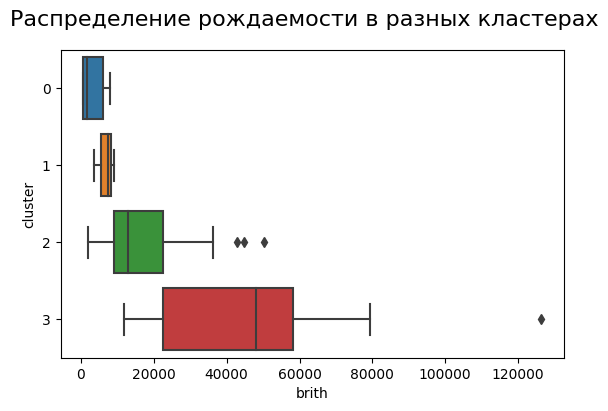

In [673]:
fig = plt.figure(figsize=(6.5, 4))
sns.boxplot(data=df, x='brith', y='cluster', orient='h')
fig.suptitle('Распределение рождаемости в разных кластерах',fontsize=16);

print('Нулевая гипотеза: рождаемость не зависит от кластера')
print(f"Kruskal-Wallis p-value = {kruskal_pvalue(df, 'brith'):.3f}")

Нет явной зависимости денежного благополучия от рождаемости детей. Самая высокая рождаемость в регионах центральной России.

In [678]:
# Нормируем пенсию на размер потребительской корзины
df['pension norm'] = df['pension'] / df['living_wage']
# Пересчитываем кол-во преступлений на 100 тыс. населения
# Кол-во детей в детских домах на 100 тыс. населения
df['orphanage'] = (
    df['orhans'] / df['population'] * 100_000)

cols = ['cash capita','formal wage','child mortality','disabled','alcoholism','narcotism','gross product','living area','poor living conditions','general morbidity',
'teen pregnancy','brith','proverty percent','poverty children','poverty pensioner','poverty man','minerals mining','electricity and gas','water and garbage collection',
'manufacturing industries','industrial production','retail per capita','orhans','adopted children','number of pensioners','pension','living_wage','children %','population',
'retired %']

cols_s = cols.copy()
for col in cols:
    p = kruskal_pvalue(df, col)
    print(f'{col}:   p-value = {p:.3f}')
    if p > 0.05: 
        cols_s.remove(col)

cash capita:   p-value = 0.000
formal wage:   p-value = 0.000
child mortality:   p-value = 0.000
disabled:   p-value = 0.000
alcoholism:   p-value = 0.000
narcotism:   p-value = 0.312
gross product:   p-value = 0.000
living area:   p-value = 0.482
poor living conditions:   p-value = 0.507
general morbidity:   p-value = 0.050
teen pregnancy:   p-value = 0.001
brith:   p-value = 0.000
proverty percent:   p-value = 0.000
poverty children:   p-value = 0.012
poverty pensioner:   p-value = 0.799
poverty man:   p-value = 0.053
minerals mining:   p-value = 0.003
electricity and gas:   p-value = 0.000
water and garbage collection:   p-value = 0.000
manufacturing industries:   p-value = 0.000
industrial production:   p-value = 0.000
retail per capita:   p-value = 0.000
orhans:   p-value = 0.003
adopted children:   p-value = 0.000
number of pensioners:   p-value = 0.000
pension:   p-value = 0.001
living_wage:   p-value = 0.003
children %:   p-value = 0.005
population:   p-value = 0.000
retired %:

Кластеры не отличаются по следующим характеристикам: Уровень наркомании, средняя жил. площадь на человека, плохие жилищьные условия, заболиваемость, процент детей ,пенсионеров и людей рабочего возраста в семьях живущих за чертой бедности.

Построим графики распределений для значимо отличающихся характеристик.

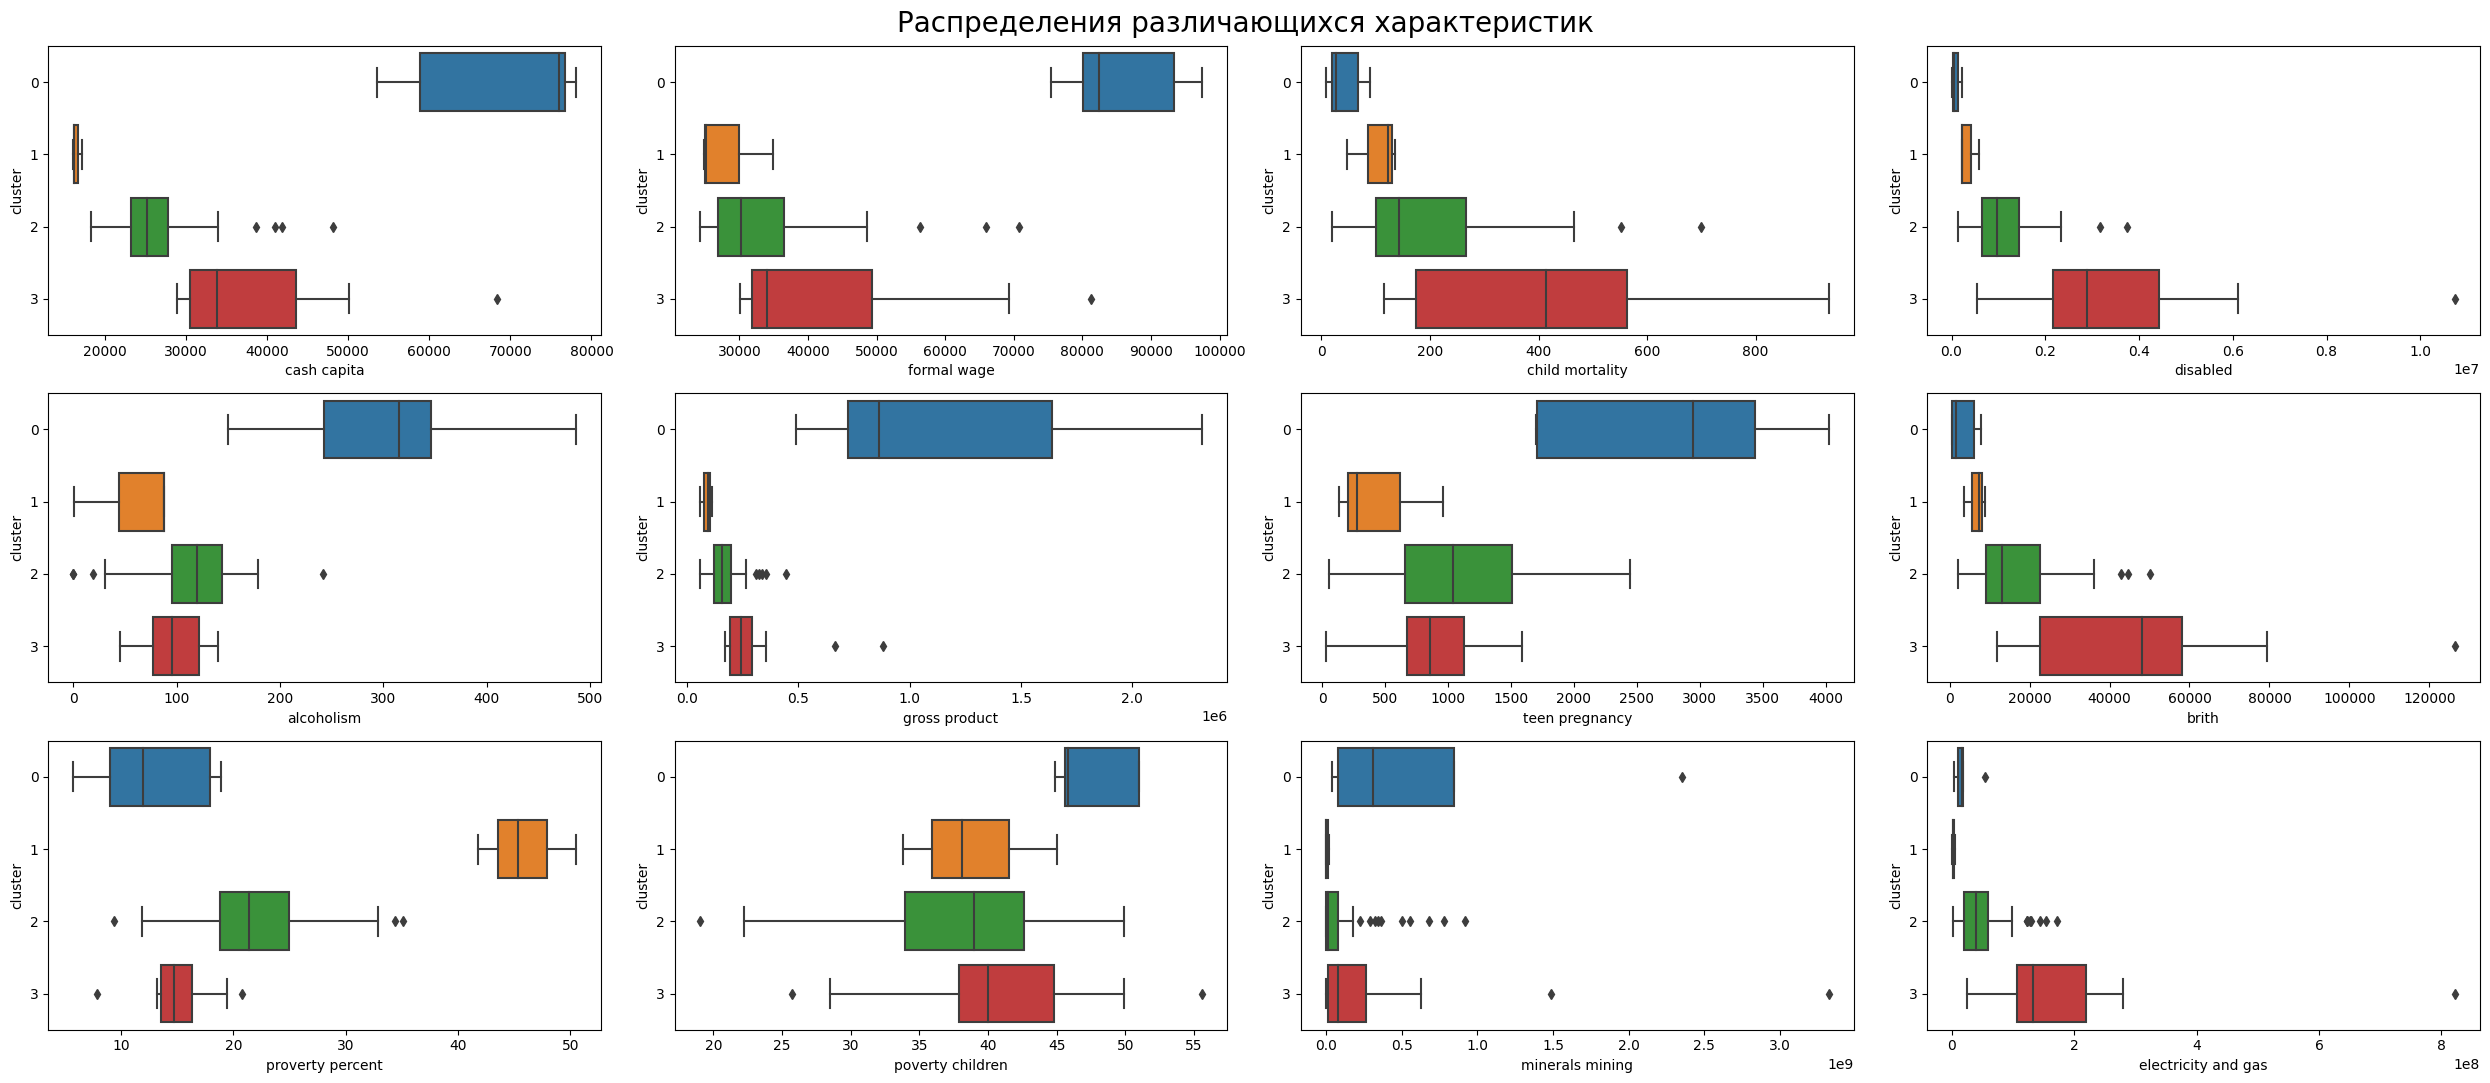

In [679]:
fig, ax = plt.subplots(3, 4, figsize=(25, 11))
i = 0
for row in range(3):
    sns.boxplot(data=df, x=cols_s[i], y='cluster', orient='h', ax=ax[row,0])
    sns.boxplot(data=df, x=cols_s[i+1], y='cluster', orient='h', ax=ax[row,1])
    sns.boxplot(data=df, x=cols_s[i+2], y='cluster', orient='h', ax=ax[row,2])
    sns.boxplot(data=df, x=cols_s[i+3], y='cluster', orient='h', ax=ax[row,3])
    i += 4
fig.suptitle('Распределения различающихся характеристик', 
             fontsize=20)
plt.tight_layout()

**Описание распределений**

*Кластер 0 - Северные регионы, наибоьший заработок (5 шт.), кластер 1 - беднейшие регионы (3 шт.), кластер 2 - наибольший кластер, средние показатели (64 шт.), кластре 3 - преимущественно регионы Центральной ФО+ несколько с Урала, средние показатели (13 шт.);*

Слева направо, сверху вниз

- Среднемесячный доход больше в 'Северных' регонах,далее идёт Центральный ФО, остальная часть россии, и наименший уровень ЗП в беднейшем кластере.

- Прожиточный минимум расположен так же, как показатель зарплаты,единственно по пропорциям беднейший кластер пересекается с наибольшем кластером

- Детская смертность, как не странно лидером по детской смертности является кластер с Центарльным ФО, далее идёт наибольший кластар, на третьем месте беднейший кластер, хотя по графикам выше детей в беднейших регионах больше. Замыкает показать Северный кластер. 

- Люди с ограниченными физ. возможностями больше распространены в Центральном ФО, что не странно, т.к. там больше условий для людей с инвалидностью, дальее идёт наибольший кластер, в беднейших регионах значительно меньше инвалидов, как и в Северных регионах.

- Алкоголизм, более всего распространён в благополучных Северных регионах, в свою очередь в беднейшем кластере меньше всего проблем с алкоголем.

- Лидером по валовому региональному продукту является кластер с Северными регионами, на последнем месте беднейшие регионы.

- Подростковая беременность расположена интересно, лидер тут благополучный кластер с Северными регионами, беднейший кластер находится на последнем месте по чеслу беременностей среди подростков.

- Показатель рождаемости видимо отображается некорректно, т.к. по прошлым графикам наибольшее количество детей было в неблагополучных регонах, при этом по рождаемости эти регионы на последнем месте. Неблагполучные регионы должны быть на первом месте по показателю рождаемости 

- Процент населения за чертой бедности, на первом месте неблагоприятные регионы, на последнем Северны регионы.

- Наибольший процент детей в малоимущих семьях наблюдается в Северном кластере, что возможно, т.к. в северных регионах множество коренного населения, остальные регионы в диапазоне от 35 до 45%

- Добыча полехных ископаемых наиболее развита в Северных регионах, на втором месте кластер Центрального ФО, так же в самом обширном кластере наблюдаются выбросы, которые скорее всего не являются выбросами, т.к. там находится большое количество регионов, в том чесле с промышленностью.


Ячейка ниже позволяет посмотреть лидеров и аутсайдеров по какой-либо характеристике внутри кластера. 

In [681]:
col = 'living_wage'  # колонка
cluster = 2          # кластер

mask = df['cluster'] == cluster
df[mask][col].sort_values(ascending=False)

region
Камчатский край                 21524.0
Республика Саха (Якутия)        17824.0
Мурманская область              17723.0
Хабаровский край                15569.0
Еврейская автономная область    15416.0
                                 ...   
Ставропольский край              9777.0
Оренбургская область             9760.0
Саратовская область              9631.0
Пензенская область               9610.0
Республика Мордовия              9378.0
Name: living_wage, Length: 64, dtype: float64

# Вывод

Охарактеризованы кластеры:

1. Наиболее богатые регионы
2. Бедные регионы
3. Регионы средние, большое кол-во регионов
4. Регионы средние, преимущественно Центральный ФО

Был проведен анализ социально-демографических групп населения и установлено, что наиболее уязвимыми в финансовом плане являются семьи с детьми. При этом в кластере самых бедных регионов наблюдается низкая рождаемость, что противоречит первому тезису, скорее всего ошибка в данных по рождаемоти, остановимся на том, что т.к. в бедных регионах больше детей, то рождаемость тоже больше, из-за детей повышается фин. нагрузка на родителей. Доля детей среди населения в этих регионах на 10% выше, чем в других регионах. В остальном процент детей не сиьно зависит от региона, на втором месте находятся Северные регионы, далее идут средние. В бедных регионах значительно меньше людей пенсионного возраста (менее 15%). Также был проведен анализ различий других характеристик набора данных по кластерам. Описание имеющихся корреляций дано выше.

In [682]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
